## Auther: Mohammed Sherif Safa

## #Task 5 Exploratory Data Analysis - Sports

## The Sparks Foundation (GRIP) 

## 1- Indian Premier League 
(IPL) is a professional cricket league in India, it contains a lot of information about the IPL such as : Batting Teams, Bowling Teams, who is winner, who gots player of the match, and factors contributong win or loss of a team.
Let's load and take a look!

In [60]:
#importing all libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.patches as mpatches
from matplotlib import cm

warnings.filterwarnings('ignore')

In [61]:
#Load matches dataset
indianPLMatches = pd.read_csv(r"datasets/matches.csv")

#show the first 5 rows
indianPLMatches.head(5)

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [62]:
#load deliveries dataset
indianPLDeliveries = pd.read_csv(r"datasets/deliveries.csv")

#show the first 5 rows 
indianPLDeliveries.head(5)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

# Describtion
1. indianPLMatches:
 - id: A unique identifier for each game in the dataset, data type : integer.
 - season: The year in which the game was played, data type : integer.
 - city: The city in which the game was played, data type : object.
 - date: The date of the game in the format YYYY-MM-DD, data type : object.
 - team1: The name of the first team playing in the game, data type : object.
 - team2: The name of the second team playing in the game, data type : object.
 - toss_winner: The team that won the coin toss and had the opportunity to choose whether to bat or bowl first, data type : object.
 - toss_decision: The decision made by the team that won the coin toss, either to bat or bowl first, data type : object.
 - result: The result of the game, either "normal" (meaning it was completed without any interruptions), "tie" (meaning the game ended in a tie), "no result" (meaning the game was not completed due to weather or other reasons), data type : object.
 - dl_applied: A binary variable indicating whether the Duckworth-Lewis method was applied in the game due to interruptions or delays, data type : integer.
 - winner: The name of the team that won the game, data type : object.
 - win_by_runs: The number of runs by which the winning team won the game, if applicable, data type : integer.
 - win_by_wickets: The number of wickets by which the winning team won the game, if applicable, data type : integer.
 - player_of_match: The name of the player who was awarded the "Man of the Match" award for their performance in the game, data type : object.
 - venue: The name of the stadium or venue in which the game was played, data type : object.
 - umpire1: The name of the first umpire who officiated the game, data type : object.
 - umpire2: The name of the second umpire who officiated the game, data type : object
 - umpire3: The name of the third umpire who officiated the game, if applicable, data type : category.
 - points: The number of points earned by the winning team in the game, if applicable, data type : integer.
2. indianPLDeliveries:
 - match_id: A unique identifier for the match in which the ball was bowled, data type : integer.
 - inning: The innings number (1st or 2nd) during which the ball was bowled, data type : integer.
 - batting_team: The name of the team batting during the innings in which the ball was bowled, data type : object.
 - bowling_team: The name of the team bowling during the innings in which the ball was bowled, data type : object.
 - over: The over number in which the ball was bowled (e.g. 1.1 refers to the first ball of the first over), data type : integer.
 - ball: The ball number within the over in which the ball was bowled, data type : integer.
 - batsman: The name of the batsman facing the ball, data type : object.
 - non_striker: The name of the non-striking batsman during the ball, data type : object.
 - bowler: The name of the bowler who bowled the ball, data type :  object.
 - is_super_over: A binary variable indicating whether the ball was bowled during a Super Over (a tiebreaker used in some limited-overs cricket matches), data type : integer.
 - wide_runs: The number of runs awarded to the batting team due to a wide ball (a ball that is too far from the batsman to be hit), data type : integer.
 - bye_runs: The number of runs awarded to the batting team due to byes (runs scored when the ball passes the batsman without being hit and the wicket-keeper fails to stop it), data type : integer.
 - legbye_runs: The number of runs awarded to the batting team due to leg byes (runs scored when the ball hits the batsman's body or equipment and goes away from the fielders), data type : integer.
 - noball_runs: The number of runs awarded to the batting team due to a no ball (a ball that is illegal due to the bowler overstepping the crease or other reasons), data type : integer.
 - penalty_runs: The number of runs awarded to the batting team due to a penalty (e.g. if the fielding team is penalized for a disciplinary infraction), data type : integer.
 - batsman_runs: The number of runs scored off the bat by the batsman during the ball, data type : integer.
 - extra_runs: The total number of runs awarded to the batting team due to extras (wide balls, byes, leg byes, no balls, or penalties), data type : integer.
 - total_runs: The total number of runs scored off the ball (including runs scored off the bat, as well as any extras), data type : integer.
 - player_dismissed: The name of the batsman who was dismissed during the ball (if applicable), data type : category.
 - dismissal_kind: The type of dismissal that occurred (e.g. caught, bowled, run out, etc.) (if applicable), data type : category.
 - fielder: The name of the fielder who was involved in the dismissal (if applicable), data type : category.
 - extras_conceded: The total number of extras (wide balls, byes, leg byes, no balls, or penalties) conceded by the bowling team in the innings up to and including the ball, data type : integer.



In [63]:
#show information
indianPLMatches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [64]:
#show information
indianPLDeliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# 2- Before we dive insights the datasets
After we take a look at their structure, and the information of datasets, we found there are many null values, we must deal and handle null values and then go diving.

In [65]:
#handling the null values in the matches dataset 
#Handling null values in city column
mostFrequentCity= indianPLMatches['city'].mode()[0]
indianPLMatches['city'].fillna(value=mostFrequentCity,inplace=True)

#Handling null values in winner column
missingWInner_ID = indianPLMatches.loc[indianPLMatches['winner'].isnull()].id.tolist()
winner_missing = indianPLDeliveries[indianPLDeliveries.match_id.isin(missingWInner_ID)==True][['batting_team','match_id']].set_index('match_id')['batting_team'].to_dict()
indianPLMatches['winner'] = indianPLMatches['winner'].fillna(indianPLMatches['id'].map(winner_missing))

#Handling null values in player_of_match column
missing_player = indianPLMatches[indianPLMatches.winner.isin(winner_missing.values())==True]
mostFrequentPlayer=missing_player.groupby('winner')['player_of_match'].apply(lambda x : x.mode()).to_dict()
mostFrequentPlayer={key[0]: value for key, value in mostFrequentPlayer.items()}
indianPLMatches['player_of_match']= indianPLMatches['player_of_match'].fillna(indianPLMatches['winner'].map(mostFrequentPlayer))
indianPLMatches.isnull().sum()

#Handling null values in umpire1 column
mostFrequentumpire1 = indianPLMatches['umpire1'].mode()[0]
indianPLMatches['umpire1'].fillna(value=mostFrequentumpire1,inplace=True)

#Handling null values in umpire2 column
mostFrequentumpire2 = indianPLMatches['umpire2'].mode()[0]
indianPLMatches['umpire2'].fillna(value=mostFrequentumpire2,inplace=True)

#Handling null values in umpire3 column
indianPLMatches['umpire3'] = indianPLMatches['umpire3'].fillna('No Third Umpire')
indianPLMatches['umpire3'] = indianPLMatches['umpire3'].astype('category')


In [66]:
#Hnadling the null values in deliveries dataset
#handling the player_dismissed column
indianPLDeliveries['player_dismissed'] = indianPLDeliveries['player_dismissed'].fillna('Not out')
indianPLDeliveries['player_dismissed'] = indianPLDeliveries['player_dismissed'].astype('category')

#handling the player_dismissed column
indianPLDeliveries['dismissal_kind'] = indianPLDeliveries['dismissal_kind'].fillna('Not dismissed')
indianPLDeliveries['dismissal_kind'] = indianPLDeliveries['dismissal_kind'].astype('category')

#handling the player_dismissed column
indianPLDeliveries['fielder'] = indianPLDeliveries['fielder'].fillna('No fielder involved')
indianPLDeliveries['fielder'] = indianPLDeliveries['fielder'].astype('category')

# 3- Most Successful teams and players?
Now after dealing with null valuse we want to take a look on who are the most successful players and teams? let's found out!

In [67]:
#create function to implement pie chart
def donut_list(list1,list2,ax:plt.Axes,title:str):

    labels = list1
    sizes = list2
    colormap_sect = np.linspace(0, 10, 25)
    colors = [cm.spring(x) for x in colormap_sect]

    # Set width to 0.5 for both charts
    ax.pie(sizes, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor': '#212946', 'width': 0.5})

    # Create a white circle at the center to turn the pie chart into a donut chart
    center_circle = plt.Circle((0, 0), 0.6, color='#212946')
    fig = ax.get_figure()
    fig.gca().add_artist(center_circle)
    
    percents = sizes * 100 / np.sum(sizes)
    labels = [f'{l}, {p:0.1f}%' for l, p in zip(labels, percents)]
    patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
    
    ax.legend(handles=patches, bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=8, facecolor='#212946', labelcolor='white')
    

    ax.set_title(title, fontsize=10,color="white",font="Arial",fontweight='bold')
    ax.set_aspect('equal')  # Set the aspect ratio to be equal
tossWinnerdf=indianPLMatches[indianPLMatches['toss_winner']==indianPLMatches['winner']]
tossWinnerperc= len(tossWinnerdf)/len(indianPLMatches)
loseperc= (len(indianPLMatches)-len(tossWinnerdf))/len(indianPLMatches)
slices=[tossWinnerperc,loseperc]
label=["Yes","No"]
#create function to implement pie chart
def plot_donut_chart(df: pd.DataFrame, column: str, ax: plt.Axes, title: str):
    pieData = pd.DataFrame(df[column].value_counts())
    labels = pieData.index.values
    sizes = pieData[column].values
    colormap_sect = np.linspace(0, 10, 25)
    colors = [cm.spring(x) for x in colormap_sect]

    # Set width to 0.5 for both charts
    ax.pie(sizes, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor': '#212946', 'width': 0.5})

    # Create a white circle at the center to turn the pie chart into a donut chart
    center_circle = plt.Circle((0, 0), 0.6, color='#212946')
    fig = ax.get_figure()
    fig.gca().add_artist(center_circle)
    
    percents = sizes * 100 / sizes.sum()
    labels = [f'{l}, {p:0.1f}%' for l, p in zip(labels, percents)]
    patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
    
    ax.legend(handles=patches, bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=8, facecolor='#212946', labelcolor='white')

    ax.set_title(title, fontsize=10, color="white",font="Arial",fontweight='bold')
    ax.set_aspect('equal')  # Set the aspect ratio to be equal
    
#create function to implement bar plot 
def bar_plot(df:pd.DataFrame,x_axes:str,y_axes:str,ax:plt.Axes,x_label:str,y_label:str,title:str):
    sns.barplot(data = df, x=x_axes,y=y_axes, ax=ax)
    ax.set_xlabel(x_label,fontsize=15,labelpad=10, color="white",font="Arial")
    ax.set_ylabel(y_label, fontsize=15,labelpad=10, color="white",font="Arial")
    ax.set_title(title, fontsize=20, y=1.05, color="white",fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, color="white",font="Arial")
    ax.set_yticklabels(ax.get_yticklabels(), color="white",font="Arial")
    ax.grid(color='#2A3459')
    ax.set_facecolor("#212946")

#create function to implement line plot 
def line_plot(df:pd.DataFrame,x_axes:str,y_axes:str,ax:plt.Axes,x_label:str,y_label:str,title:str):
    sns.lineplot(data = df, x=x_axes,y=y_axes, ax=ax)
    ax.set_xlabel(x_label,fontsize=15,labelpad=10, color="white",font="Arial")
    ax.set_ylabel(y_label, fontsize=15,labelpad=10, color="white",font="Arial")
    ax.set_title(title, fontsize=20, y=1.05, color="white",fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, color="white",font="Arial")
    ax.set_yticklabels(ax.get_yticklabels(), color="white",font="Arial")
    ax.grid(color='#2A3459')
    ax.set_facecolor("#212946")
    sns.despine(left=True, bottom=True)


#create function to implement scatter plot 
def scatter_plot(df:pd.DataFrame,x_axes:str,y_axes:str,ax:plt.Axes,hue:str,x_label:str,y_label:str,title:str):
    sns.scatterplot(data = df, x=x_axes,y=y_axes, ax=ax,hue=hue)
    ax.set_xlabel(x_label,fontsize=15,labelpad=10, color="white",font="Arial")
    ax.set_ylabel(y_label, fontsize=15,labelpad=10, color="white",font="Arial")
    ax.set_title(title, fontsize=20, y=1.05, color="white",fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), color="white",font="Arial")
    ax.set_yticklabels(ax.get_yticklabels(), color="white",font="Arial")
    ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5),fontsize=8, facecolor='#212946', labelcolor='white')
    ax.grid(color='#2A3459')
    ax.set_facecolor("#212946")



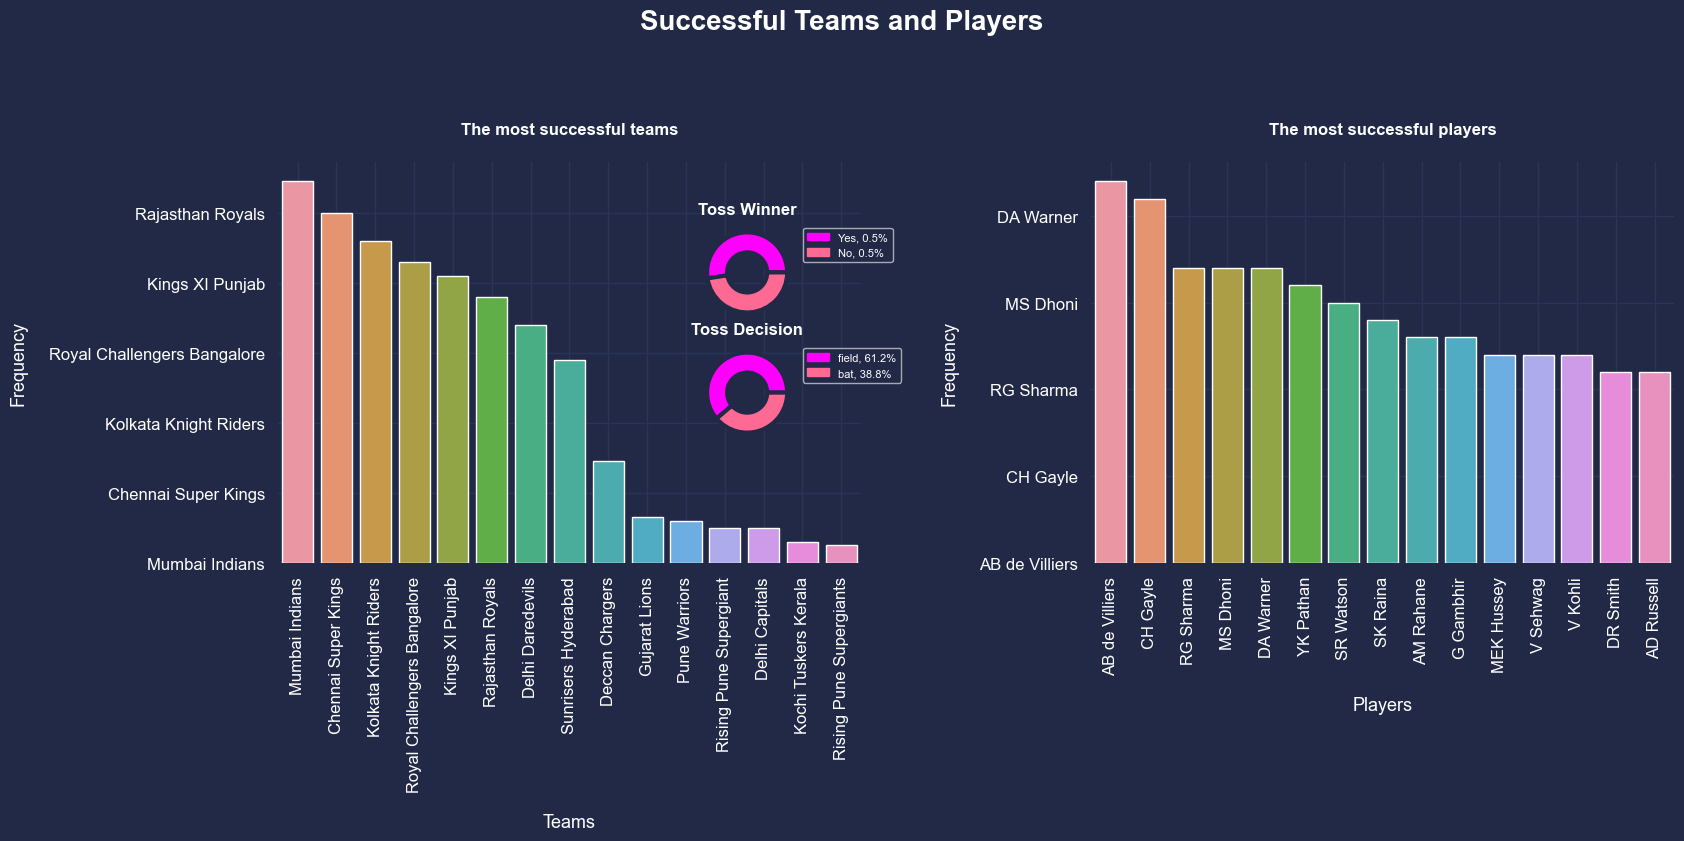

In [68]:
#the most 15 successful players
successfulPL = indianPLMatches['player_of_match'].value_counts().head(15)

# create a figure with two subplots side by side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17,8))
fig.set_facecolor("#212946")
#plot the most successful teams
sns.color_palette()
sns.despine(left=True, bottom=True)
sns.countplot(data = indianPLMatches, x= "winner",  ax=ax[0],order= indianPLMatches['winner'].value_counts().index)
ax[0].set_title("The most successful teams", fontsize=15,y=1.05,color="white",font="Arial",fontweight='bold')
ax[0].set_xlabel("Teams", labelpad =15, fontsize=13,color="white",font="Arial")
ax[0].set_ylabel("Frequency", labelpad =15, fontsize=13,color="white",font="Arial")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, color="white",font="Arial")
ax[0].set_yticklabels(ax[0].get_xticklabels(), color="white",font="Arial")
ax[0].grid(color='#2A3459')
ax[0].set_facecolor("#212946")
TossWinnerPie=ax[0].inset_axes([0.68,0.6,0.25,0.25])
ToosDecision=ax[0].inset_axes([0.68,0.3,0.25,0.25])
donut_list(label,slices,TossWinnerPie,"Toss Winner")
plot_donut_chart(indianPLMatches,"toss_decision",ToosDecision,"Toss Decision")

#plot the most successful teams
sns.barplot(x = successfulPL.index,y=successfulPL.values, ax=ax[1])
ax[1].set_title("The most successful players", fontsize=15,y=1.05,color="white",font="Arial",fontweight='bold')
ax[1].set_xlabel("Players", labelpad =15, fontsize=13,color="white",font="Arial")
ax[1].set_ylabel("Frequency", labelpad =15, fontsize=13,color="white",font="Arial")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,color="white",font="Arial")
ax[1].set_yticklabels(ax[1].get_xticklabels(), color="white",font="Arial")
ax[1].grid(color='#2A3459')
ax[1].set_facecolor("#212946")
# add a main title to the entire figure
fig.suptitle("Successful Teams and Players", fontsize=20,y=1.05,color="white",font="Arial",fontweight='bold')
plt.tight_layout()

# display the plot
plt.show()

# 4- Winners each season
Wanting to know the teams win by season to dive more.

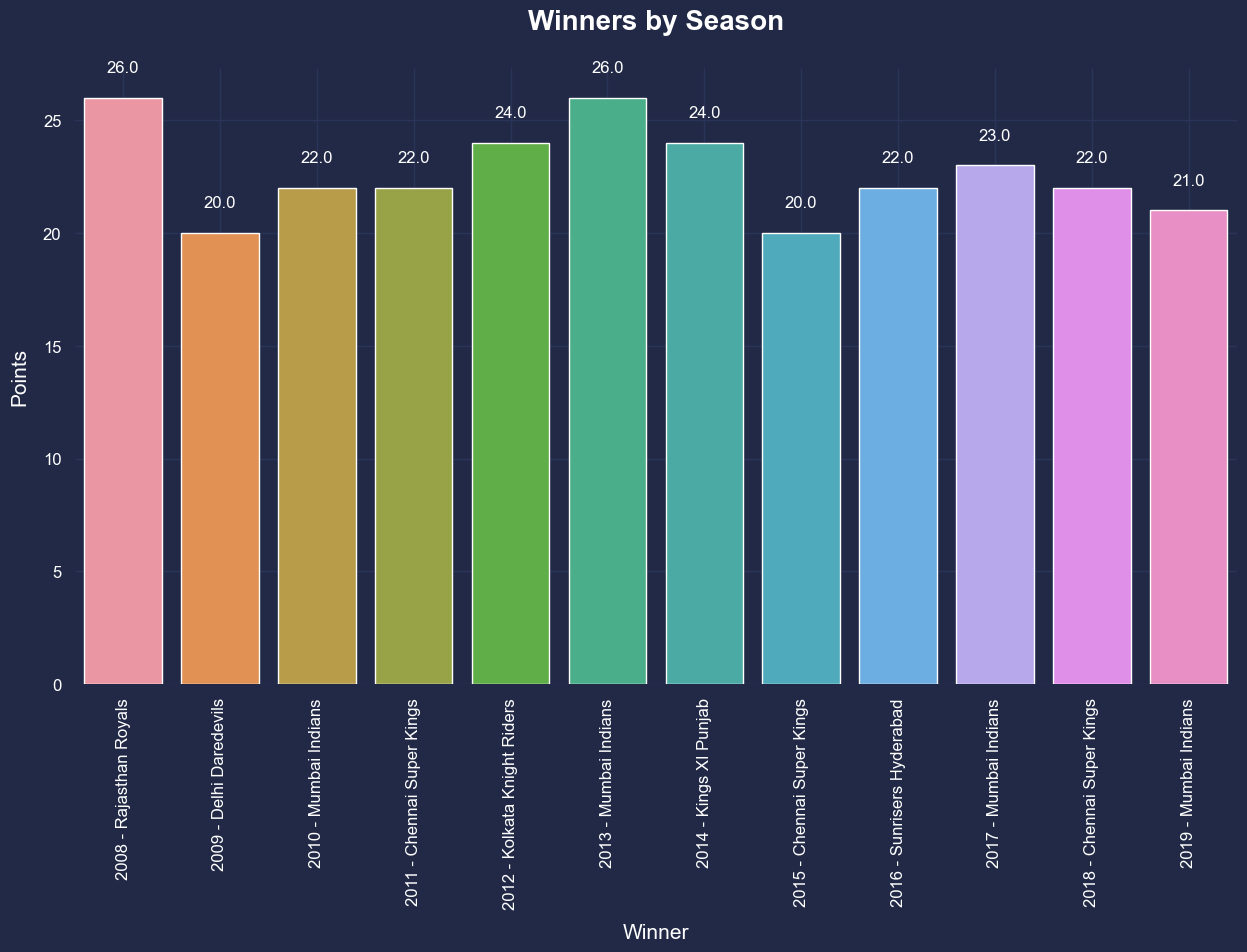

In [69]:
point = {"normal":2, "tie":1, "no result":1}
indianPLMatches["points"] = indianPLMatches["result"].map(point)
winnerSeason_df = indianPLMatches.groupby(by=["season", "winner"])["points"].sum().reset_index()
winnerSeason_df = winnerSeason_df.loc[winnerSeason_df.groupby("season")["points"].idxmax()]

# Create a list of x-axis labels with prefixes
x_labels = []
for i in range(len(winnerSeason_df)):
    season = winnerSeason_df.iloc[i]["season"]
    winner = winnerSeason_df.iloc[i]["winner"]
    x_labels.append(f"{season} - {winner}")
plt.gcf().set_facecolor("#212946")

color = sns.color_palette("muted")
ax = sns.barplot(data=winnerSeason_df, x=x_labels, y="points")
sns.set(rc={'figure.figsize':(15,7)})
plt.xticks(rotation=90, color="white",font="Arial")
plt.yticks(color="white",font="Arial")
plt.title("Winners by Season", y=1.05, fontsize=20, color="white",fontweight='bold')
plt.xlabel("Winner", fontsize=15, labelpad=10, color="white",font="Arial")
plt.ylabel("Points", fontsize=15, labelpad=10, color="white",font="Arial")
ax.grid(color='#2A3459')
ax.set_facecolor("#212946")
# Annotate the bars with their values
for i, patch in enumerate(ax.patches):
    ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 1, patch.get_height(),
            ha='center', va='bottom', fontsize=12,color="white",font="Arial")
sns.despine(left=True, bottom=True)
plt.show()

# 5- Type of the win?
we know the team can win by two ways: win by runs or win by wickets, let's figure out!

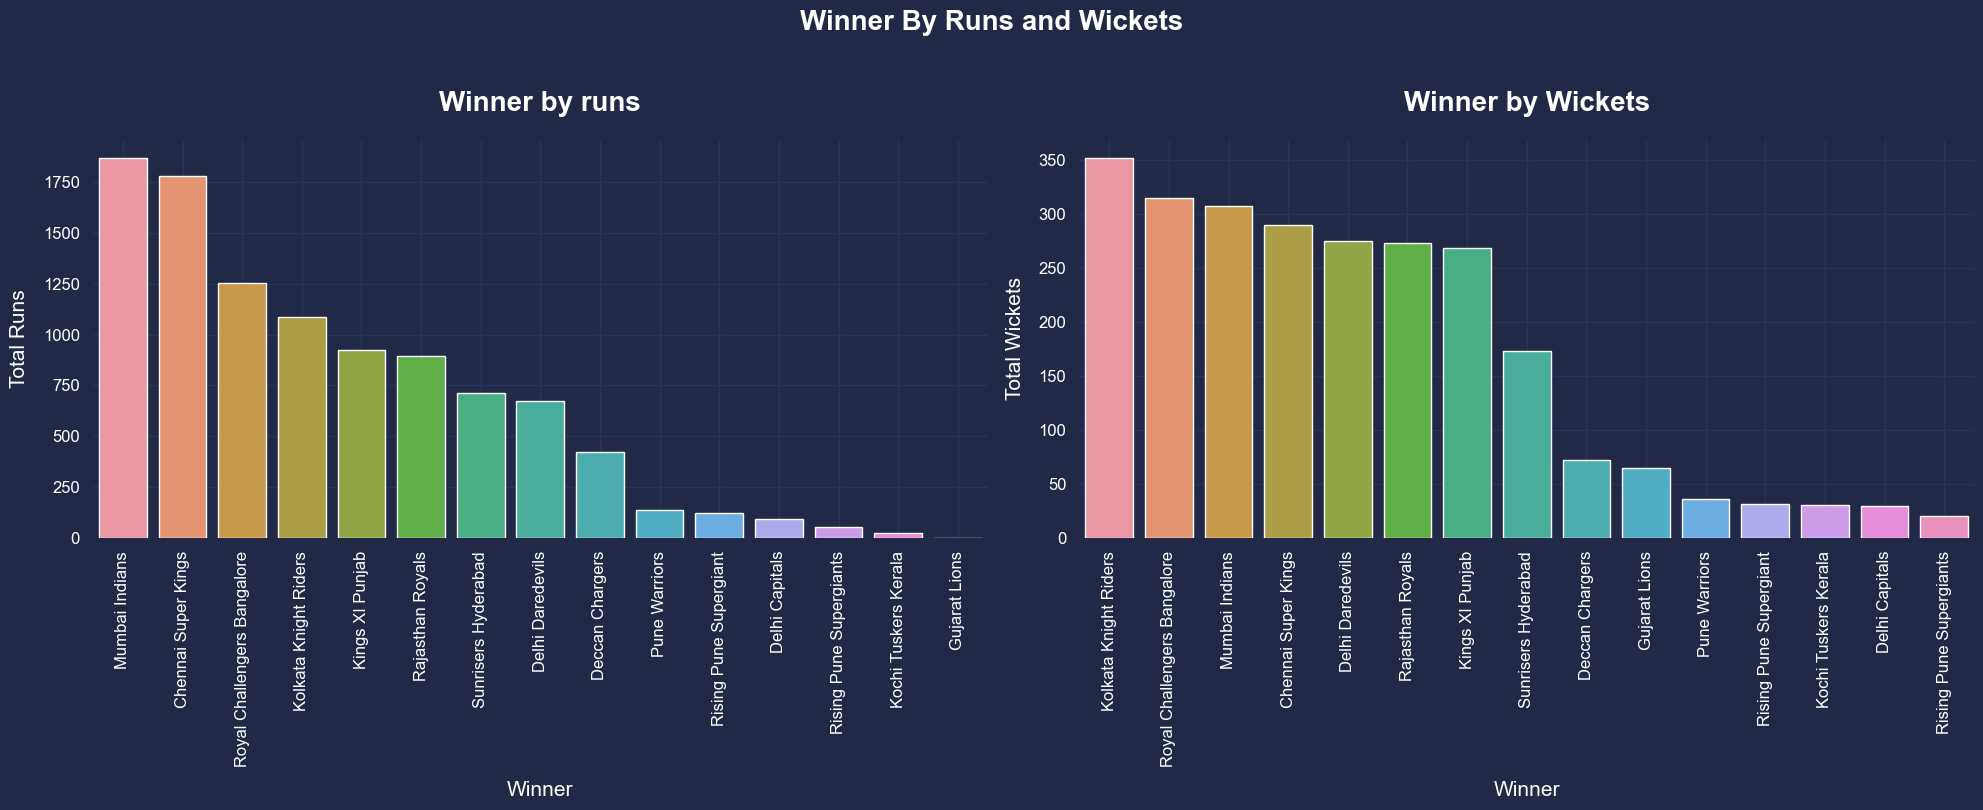

In [70]:
winner_by_runs = indianPLMatches.groupby(by='winner')['win_by_runs'].apply(lambda x: x.sum()).reset_index()
winner_by_runs=winner_by_runs.sort_values(by="win_by_runs",ascending=False)
winner_by_wickets = indianPLMatches.groupby(by='winner')['win_by_wickets'].apply(lambda x: x.sum()).reset_index()
winner_by_wickets = winner_by_wickets.sort_values(by="win_by_wickets",ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
fig.set_facecolor("#212946")

bar_plot(winner_by_runs,"winner","win_by_runs",ax[0],"Winner","Total Runs","Winner by runs")
ax[0].grid(color='#2A3459')
ax[0].set_facecolor("#212946")

bar_plot(winner_by_wickets,"winner","win_by_wickets",ax[1],"Winner","Total Wickets","Winner by Wickets")
ax[1].grid(color='#2A3459')
ax[1].set_facecolor("#212946")
# add a main title to the entire figure
fig.suptitle("Winner By Runs and Wickets", fontsize=20,y=1.01, color="white",fontweight='bold')
sns.despine(left=True, bottom=True)
plt.tight_layout()

# display the plot
plt.show()

# 6- Fav umpire
What's the most favourite umpires in the IPL?

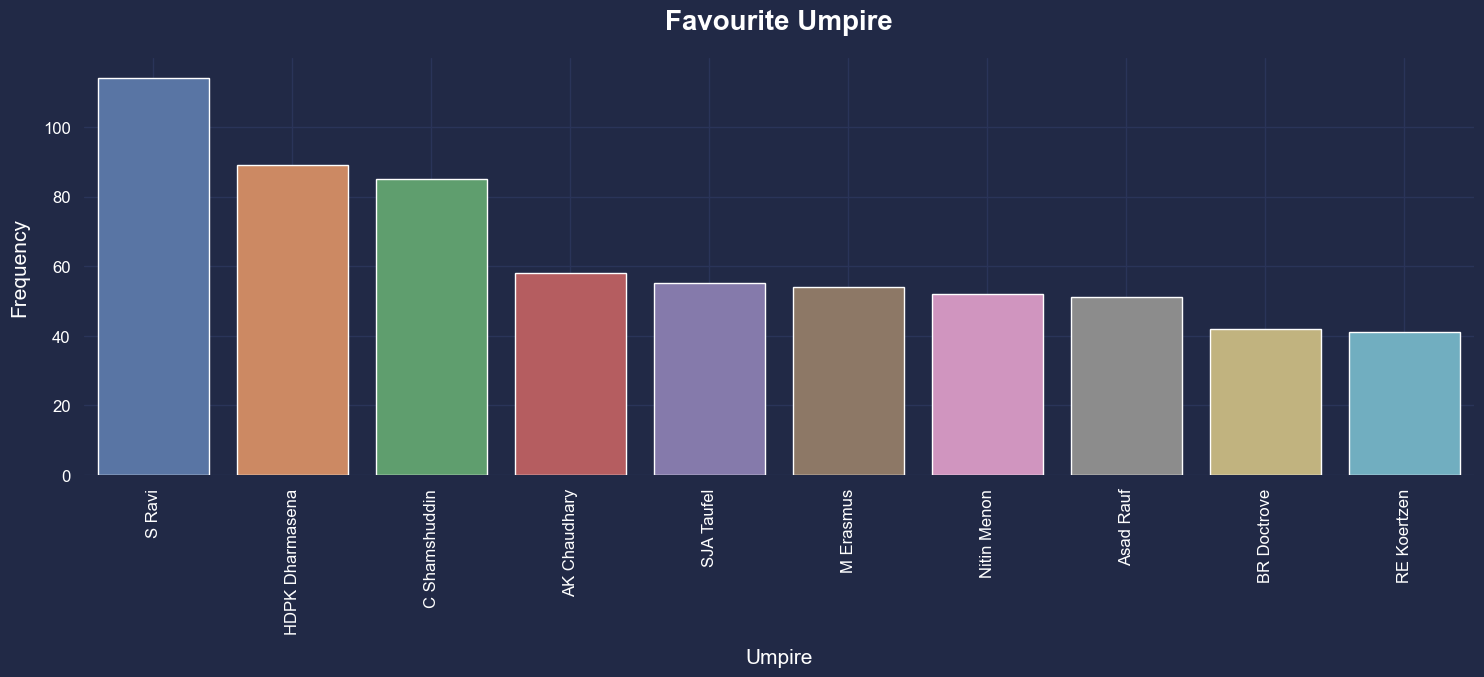

In [71]:
umpire = pd.concat([indianPLMatches['umpire1'],indianPLMatches['umpire2'],indianPLMatches['umpire3']])
umpire= umpire.value_counts().drop("No Third Umpire").head(10)

ax=sns.barplot(x= umpire.index, y= umpire.values)
plt.gcf().set_facecolor("#212946")
ax.grid(color='#2A3459')
ax.set_facecolor("#212946")
sns.set(rc={'figure.figsize':(15,8)})
plt.title("Favourite Umpire",y=1.05, fontsize=20, color="white",fontweight='bold')
plt.xticks(rotation=90,color="white",font="Arial")
plt.yticks(color="white",font="Arial")
plt.xlabel("Umpire", fontsize=15, labelpad=10, color="white",font="Arial")
plt.ylabel("Frequency", fontsize=15, labelpad=10, color="white",font="Arial")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


# 7- Batsman Performance
want to go deep more and analysis batsman performance to know the players with highest impact to use these useful information can be used to inform team selection, training strategies, and game tactics, as well as to provide a deeper understanding and appreciation of the game.

In [72]:
indianPLDeliveries['extras_conceded'] = indianPLDeliveries['wide_runs'] + indianPLDeliveries['bye_runs'] + indianPLDeliveries['legbye_runs'] + indianPLDeliveries['noball_runs'] + indianPLDeliveries['penalty_runs']

indianPL_mat_dliv= indianPLMatches.merge(indianPLDeliveries, left_on='id',right_on='match_id', how='outer')

Batsman_df = indianPL_mat_dliv.groupby(by=['season','batsman']).agg({'batsman_runs': 'sum', 'ball': 'count', 'dismissal_kind': lambda x: x[x!="Not dismissed"].count()}).reset_index()
Batsman_df = Batsman_df.loc[Batsman_df['dismissal_kind'] > 0] # Filter out rows where dismissal count is zero
Batsman_df['1s'] = indianPL_mat_dliv[indianPL_mat_dliv['batsman_runs'] == 1].groupby(by=['season','batsman'])['batsman_runs'].sum().reset_index(drop=True)
Batsman_df['2s'] = indianPL_mat_dliv[indianPL_mat_dliv['batsman_runs'] == 2].groupby(by=['season','batsman'])['batsman_runs'].sum().reset_index(drop=True)
Batsman_df['3s'] = indianPL_mat_dliv[indianPL_mat_dliv['batsman_runs'] == 3].groupby(by=['season','batsman'])['batsman_runs'].sum().reset_index(drop=True)
Batsman_df['4s'] = indianPL_mat_dliv[indianPL_mat_dliv['batsman_runs'] == 4].groupby(by=['season','batsman'])['batsman_runs'].sum().reset_index(drop=True)
Batsman_df['6s'] = indianPL_mat_dliv[indianPL_mat_dliv['batsman_runs'] == 6].groupby(by=['season','batsman'])['batsman_runs'].sum().reset_index(drop=True)
Batsman_df.columns = ['season','batsman', 'runs', 'balls', 'dismissals', '1s', '2s','3s', '4s','6s']
Batsman_df['strike_rate'] = Batsman_df['runs'] / (Batsman_df['balls']-Batsman_df['dismissals']) * 100
Batsman_df['batting_average'] = Batsman_df['runs'] / Batsman_df['dismissals']
Batsman_df['1s'] = Batsman_df['1s'].fillna(0)
Batsman_df['2s'] = Batsman_df['2s'].fillna(0)
Batsman_df['3s'] = Batsman_df['3s'].fillna(0)
Batsman_df['4s'] = Batsman_df['4s'].fillna(0)
Batsman_df['6s'] = Batsman_df['6s'].fillna(0)
Batsman_df['strike_rate'] = Batsman_df['strike_rate'].fillna(0)
Batsman_df = Batsman_df.sort_values(by=["season","runs"],ascending=[True,False])
Batsman_df.head()

season        batsman  runs  balls  dismissals    1s    2s   3s     4s  \
115    2008       SE Marsh   616    452          10   8.0   6.0  6.0  172.0   
39     2008      G Gambhir   534    394          14   6.0   8.0  3.0  108.0   
126    2008  ST Jayasuriya   514    333          13   5.0  16.0  3.0  156.0   
124    2008      SR Watson   472    322          10  26.0  12.0  3.0   20.0   
40     2008       GC Smith   441    375          12   3.0   6.0  3.0    4.0   

       6s  strike_rate  batting_average  
115  90.0   139.366516        61.600000  
39    6.0   140.526316        38.142857  
126   6.0   160.625000        39.538462  
124  48.0   151.282051        47.200000  
40   66.0   121.487603        36.750000

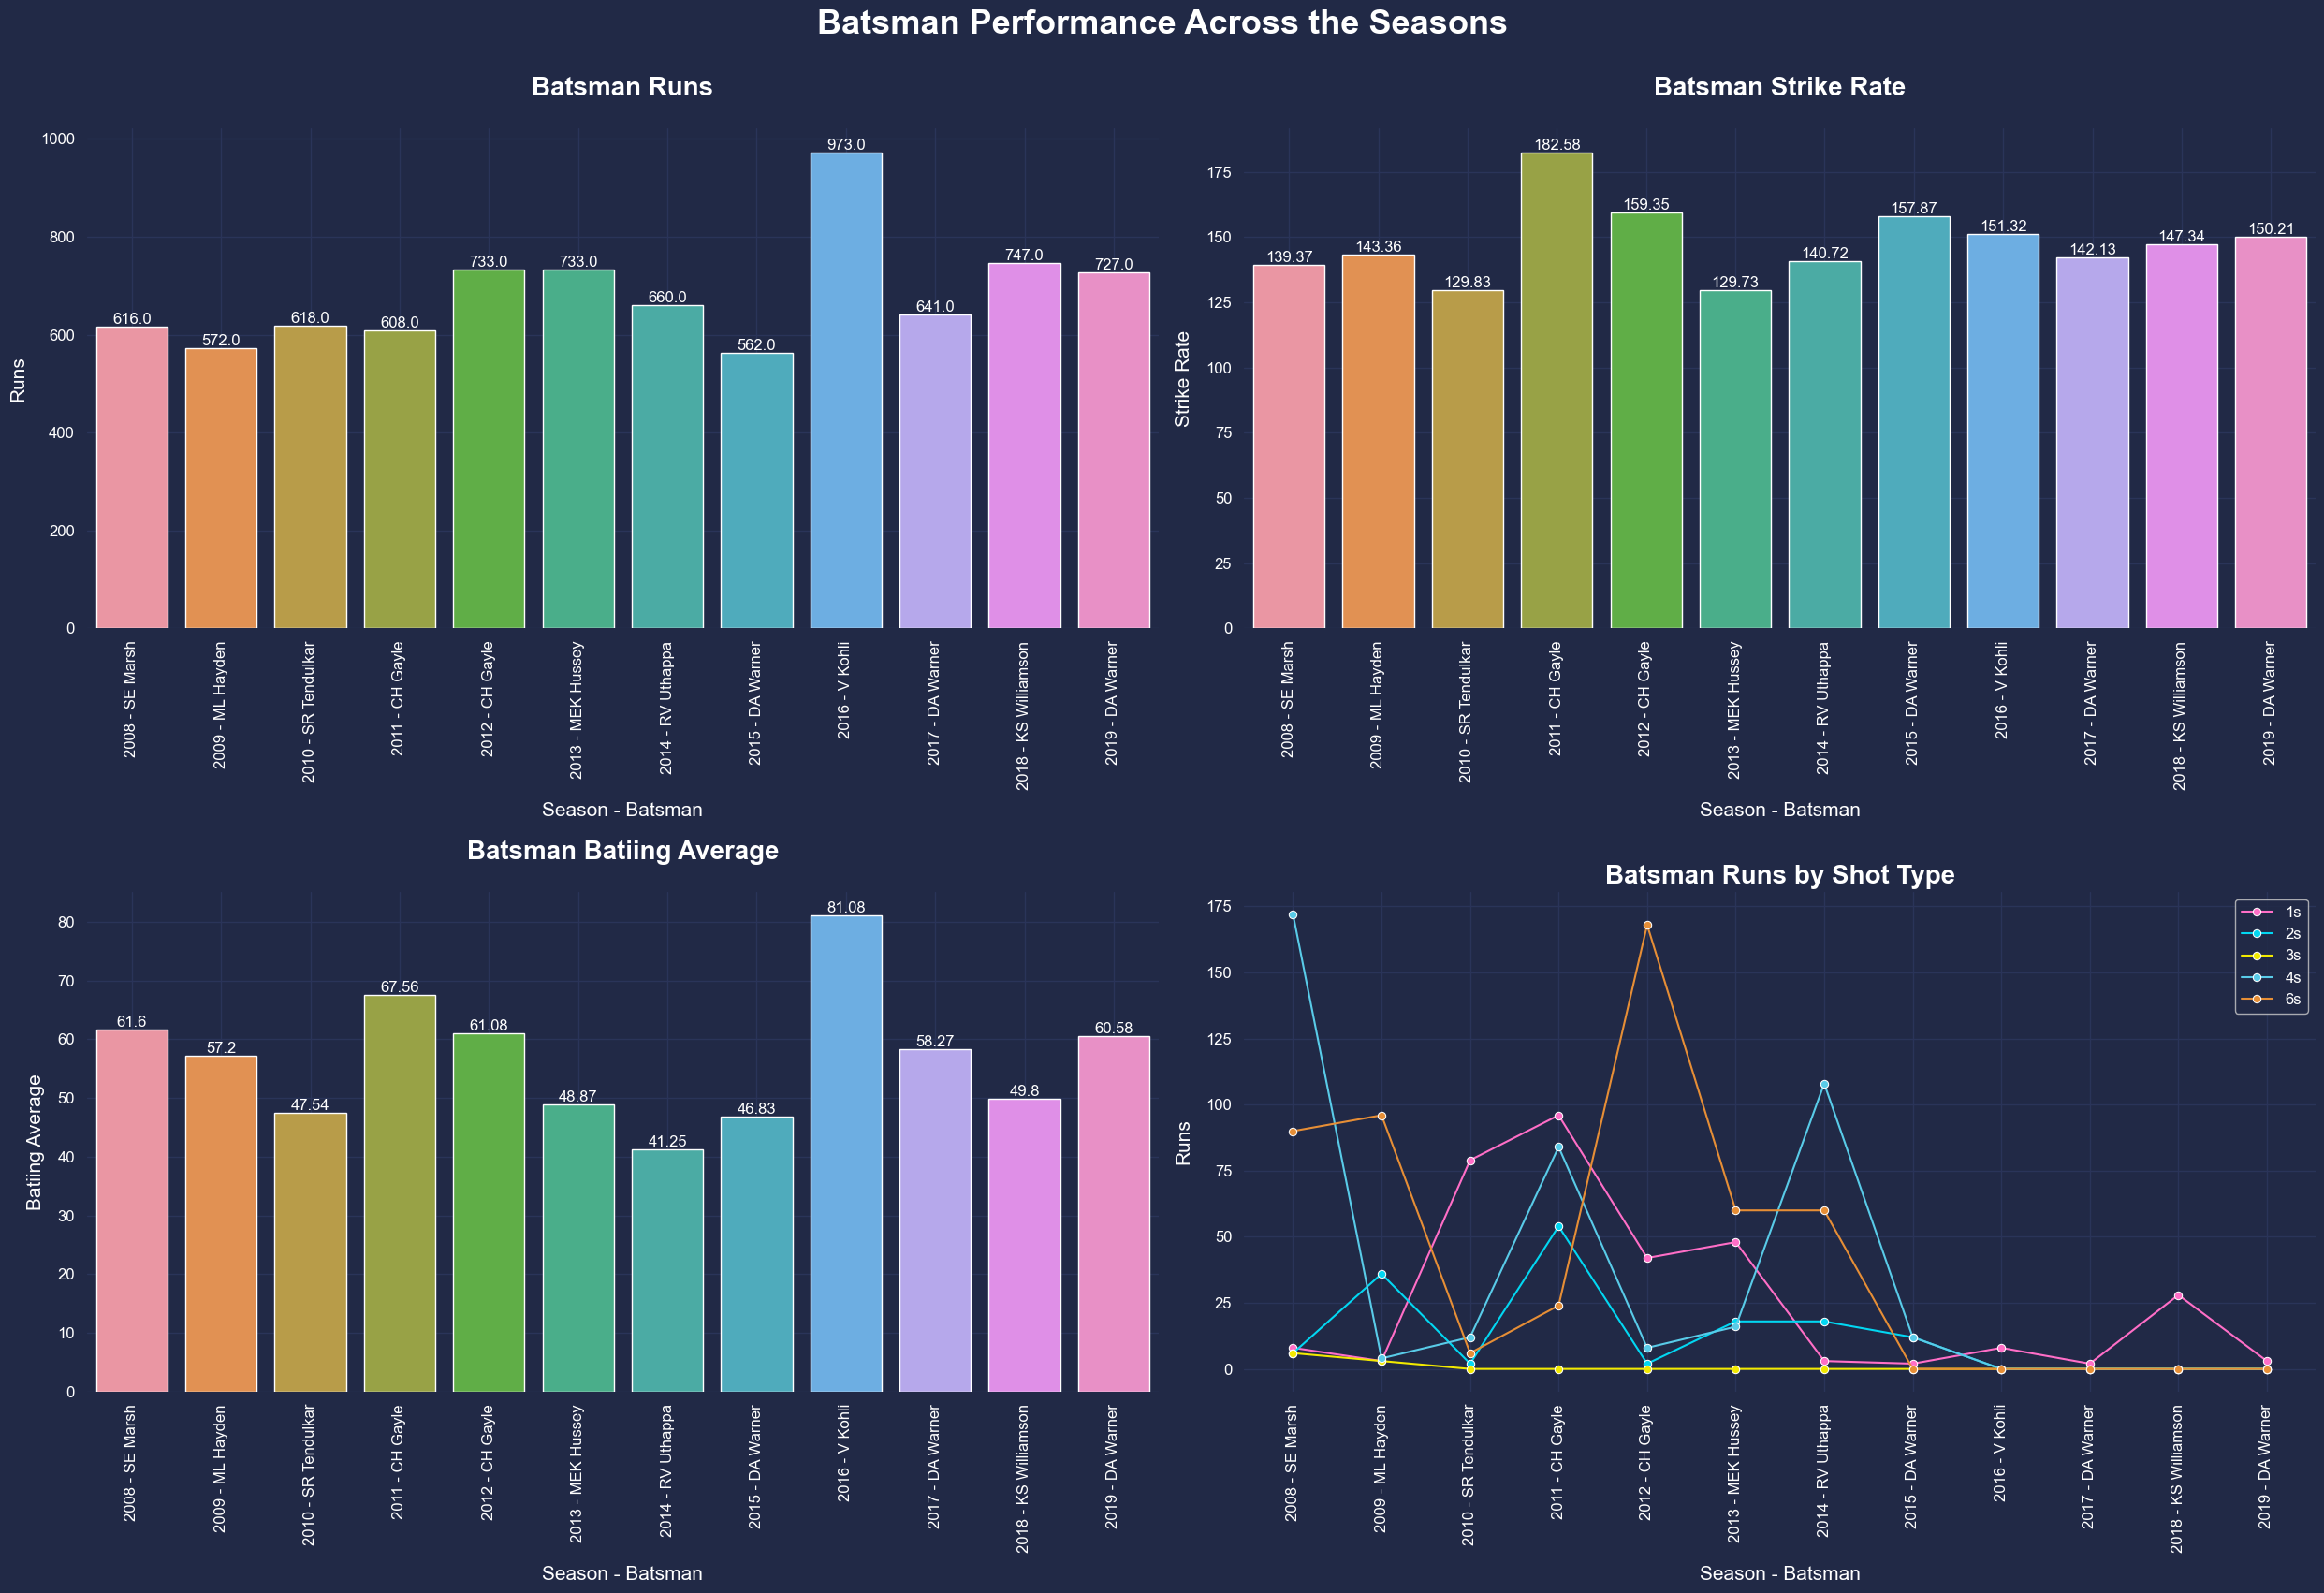

In [73]:
# group the resulting DataFrame by 'season', and get the index of the row with the maximum runs in each group
max_index = Batsman_df.groupby('season')['runs'].idxmax()

# select the rows with the maximum runs in each season from the original DataFrame, and display the batsman names
Batsmanruns_df = Batsman_df.loc[max_index]

# Create a list of x-axis labels with prefixes
x_labels = []
for i in range(len(Batsmanruns_df)):
    season = Batsmanruns_df.iloc[i]["season"]
    batsman = Batsmanruns_df.iloc[i]["batsman"]
    x_labels.append(f"{season} - {batsman}")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,17))
fig.set_facecolor("#212946")


# create the bar plot
bar_plot(Batsmanruns_df,x_labels,"runs",ax[0,0],"Season - Batsman","Runs","Batsman Runs")

# Annotate the bars with their values
for i, patch in enumerate(ax[0,0].patches):
    ax[0,0].annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                      ha='center', va='bottom', fontsize=12, color="white",font="Arial")

bar_plot(Batsmanruns_df,x_labels,"strike_rate",ax[0,1],"Season - Batsman","Strike Rate","Batsman Strike Rate")

# Annotate the bars with their values
for i, patch in enumerate(ax[0,1].patches):
    ax[0,1].annotate(str(round(patch.get_height(), 2)), (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                      ha='center', va='bottom', fontsize=12, color="white",font="Arial")
    
bar_plot(Batsmanruns_df,x_labels,"batting_average",ax[1,0],"Season - Batsman","Batiing Average","Batsman Batiing Average")

# Annotate the bars with their values
for i, patch in enumerate(ax[1,0].patches):
    ax[1,0].annotate(str(round(patch.get_height(), 2)), (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                      ha='center', va='bottom', fontsize=12, color="white",font="Arial")

shot_types = ['1s', '2s', '3s', '4s', '6s']
colors = ['#FF6EC7', '#02d7f2', '#f2e900', '#59CBE8', '#E68E36']
for i in range(len(shot_types)):
    sns.lineplot(data=Batsmanruns_df, x=x_labels, y=shot_types[i], ax=ax[1,1], label=shot_types[i], color=colors[i], marker='o')

ax[1,1].set_title("Batsman Runs by Shot Type", fontsize=20, color="white",fontweight='bold')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(),rotation=90, color="white",font="Arial")
ax[1,1].set_yticklabels(ax[1,1].get_yticklabels(), color="white",font="Arial")
ax[1,1].set_xlabel("Season - Batsman", fontsize=15, labelpad=10, color="white",font="Arial")
ax[1,1].set_ylabel("Runs", fontsize=15, labelpad=10, color="white",font="Arial")
ax[1,1].grid(color='#2A3459')
ax[1,1].set_facecolor("#212946")

# add legend
ax[1,1].legend(fontsize=12, facecolor='#212946', labelcolor='white')

fig.suptitle("Batsman Performance Across the Seasons", fontsize=26,y=1.0, color="white",fontweight='bold')
sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

# 8- Bowler Performance
After gain insights of performnace of batsmen, going forward to do the same with bowler performance 

In [74]:

# Define a function to calculate the number of maidens for each bowler
def calculate_maidens(df):
    # Filter the data to include only the valid balls (not a wide, no ball, or penalty)
    valid_balls = df[(df['wide_runs'] == 0) & (df['noball_runs'] == 0) & (df['penalty_runs'] == 0)]

    # Group the valid balls by bowler, season, and over, and count the number of overs with 0 runs
    maidens = valid_balls.groupby(['season','bowler', 'over'])['total_runs'].sum().eq(0).groupby(['season','bowler']).count().reset_index()

    # Rename the column to 'maidens'
    maidens = maidens.rename(columns={'total_runs': 'maidens'})

    # Return the DataFrame with the number of maidens for each bowler in each season
    return maidens

# Call the function to calculate the number of maidens for each bowler in each season
bowler_maidens = calculate_maidens(indianPL_mat_dliv)


In [75]:
Bowler_df = indianPL_mat_dliv.groupby(by=['season','bowler']).agg({'ball':lambda x: x.count()//6,'total_runs':'sum','player_dismissed':lambda x : x[x!='Not Out'].count(),'extra_runs':'sum'}).reset_index()
Bowler_df.columns= ['season','bowler','overs','runs','wickets','extras']
Bowler_df['maidens']= indianPL_mat_dliv.groupby(by=['season','bowler']).apply(lambda x: ((x.groupby(['season','over'])['total_runs'].sum() == 0).count())).reset_index(drop=True)
Bowler_df['economy_rate']= (Bowler_df['runs']/ Bowler_df['overs']) *6
Bowler_df= Bowler_df.merge(bowler_maidens)
Bowler_df.head(5)

season     bowler  overs  runs  wickets  extras  maidens  economy_rate
0    2008   A Kumble     39   314      236      20       16     48.307692
1    2008   A Mishra     20   140      123       6       12     42.000000
2    2008    A Nehra     46   357      280      21       15     46.565217
3    2008      A Nel      3    31       18       0        3     62.000000
4    2008  A Symonds      7   106       44      12        6     90.857143

In [76]:
minindex_runs = Bowler_df.groupby('season')['runs'].idxmin()
maxindex_wickets = Bowler_df.groupby('season')['wickets'].idxmax()
minindex_extra = Bowler_df.groupby('season')['extras'].idxmin()
minindex_economy = Bowler_df.groupby('season')['economy_rate'].idxmin()
maxindex_maidens = Bowler_df.groupby('season')['maidens'].idxmax()

# Create a list of x-axis labels with prefixes
Bowlerruns_df= Bowler_df.loc[minindex_runs]
x_labelsruns = []
for i in range(len(Bowlerruns_df)):
    season = Bowlerruns_df.iloc[i]["season"]
    bowler = Bowlerruns_df.iloc[i]["bowler"]
    x_labelsruns.append(f"{season} - {bowler}")

Bowlerwickets_df= Bowler_df.loc[maxindex_wickets]
x_labelswickets = []
for i in range(len(Bowlerwickets_df)):
    season = Bowlerwickets_df.iloc[i]["season"]
    bowler = Bowlerwickets_df.iloc[i]["bowler"]
    x_labelswickets.append(f"{season} - {bowler}")

Bowlerextra_df= Bowler_df.loc[minindex_extra]
x_labelsextra = []
for i in range(len(Bowlerextra_df)):
    season = Bowlerextra_df.iloc[i]["season"]
    bowler = Bowlerextra_df.iloc[i]["bowler"]
    x_labelsextra.append(f"{season} - {bowler}")

Bowlereconomy_df= Bowler_df.loc[minindex_economy]
x_labelseconomy = []
for i in range(len(Bowlereconomy_df)):
    season = Bowlereconomy_df.iloc[i]["season"]
    bowler = Bowlereconomy_df.iloc[i]["bowler"]
    x_labelseconomy.append(f"{season} - {bowler}")

Bowlermaidens_df= Bowler_df.loc[maxindex_maidens]
x_labelsmaidens = []
for i in range(len(Bowlermaidens_df)):
    season = Bowlermaidens_df.iloc[i]["season"]
    bowler = Bowlermaidens_df.iloc[i]["bowler"]
    x_labelsmaidens.append(f"{season} - {bowler}")


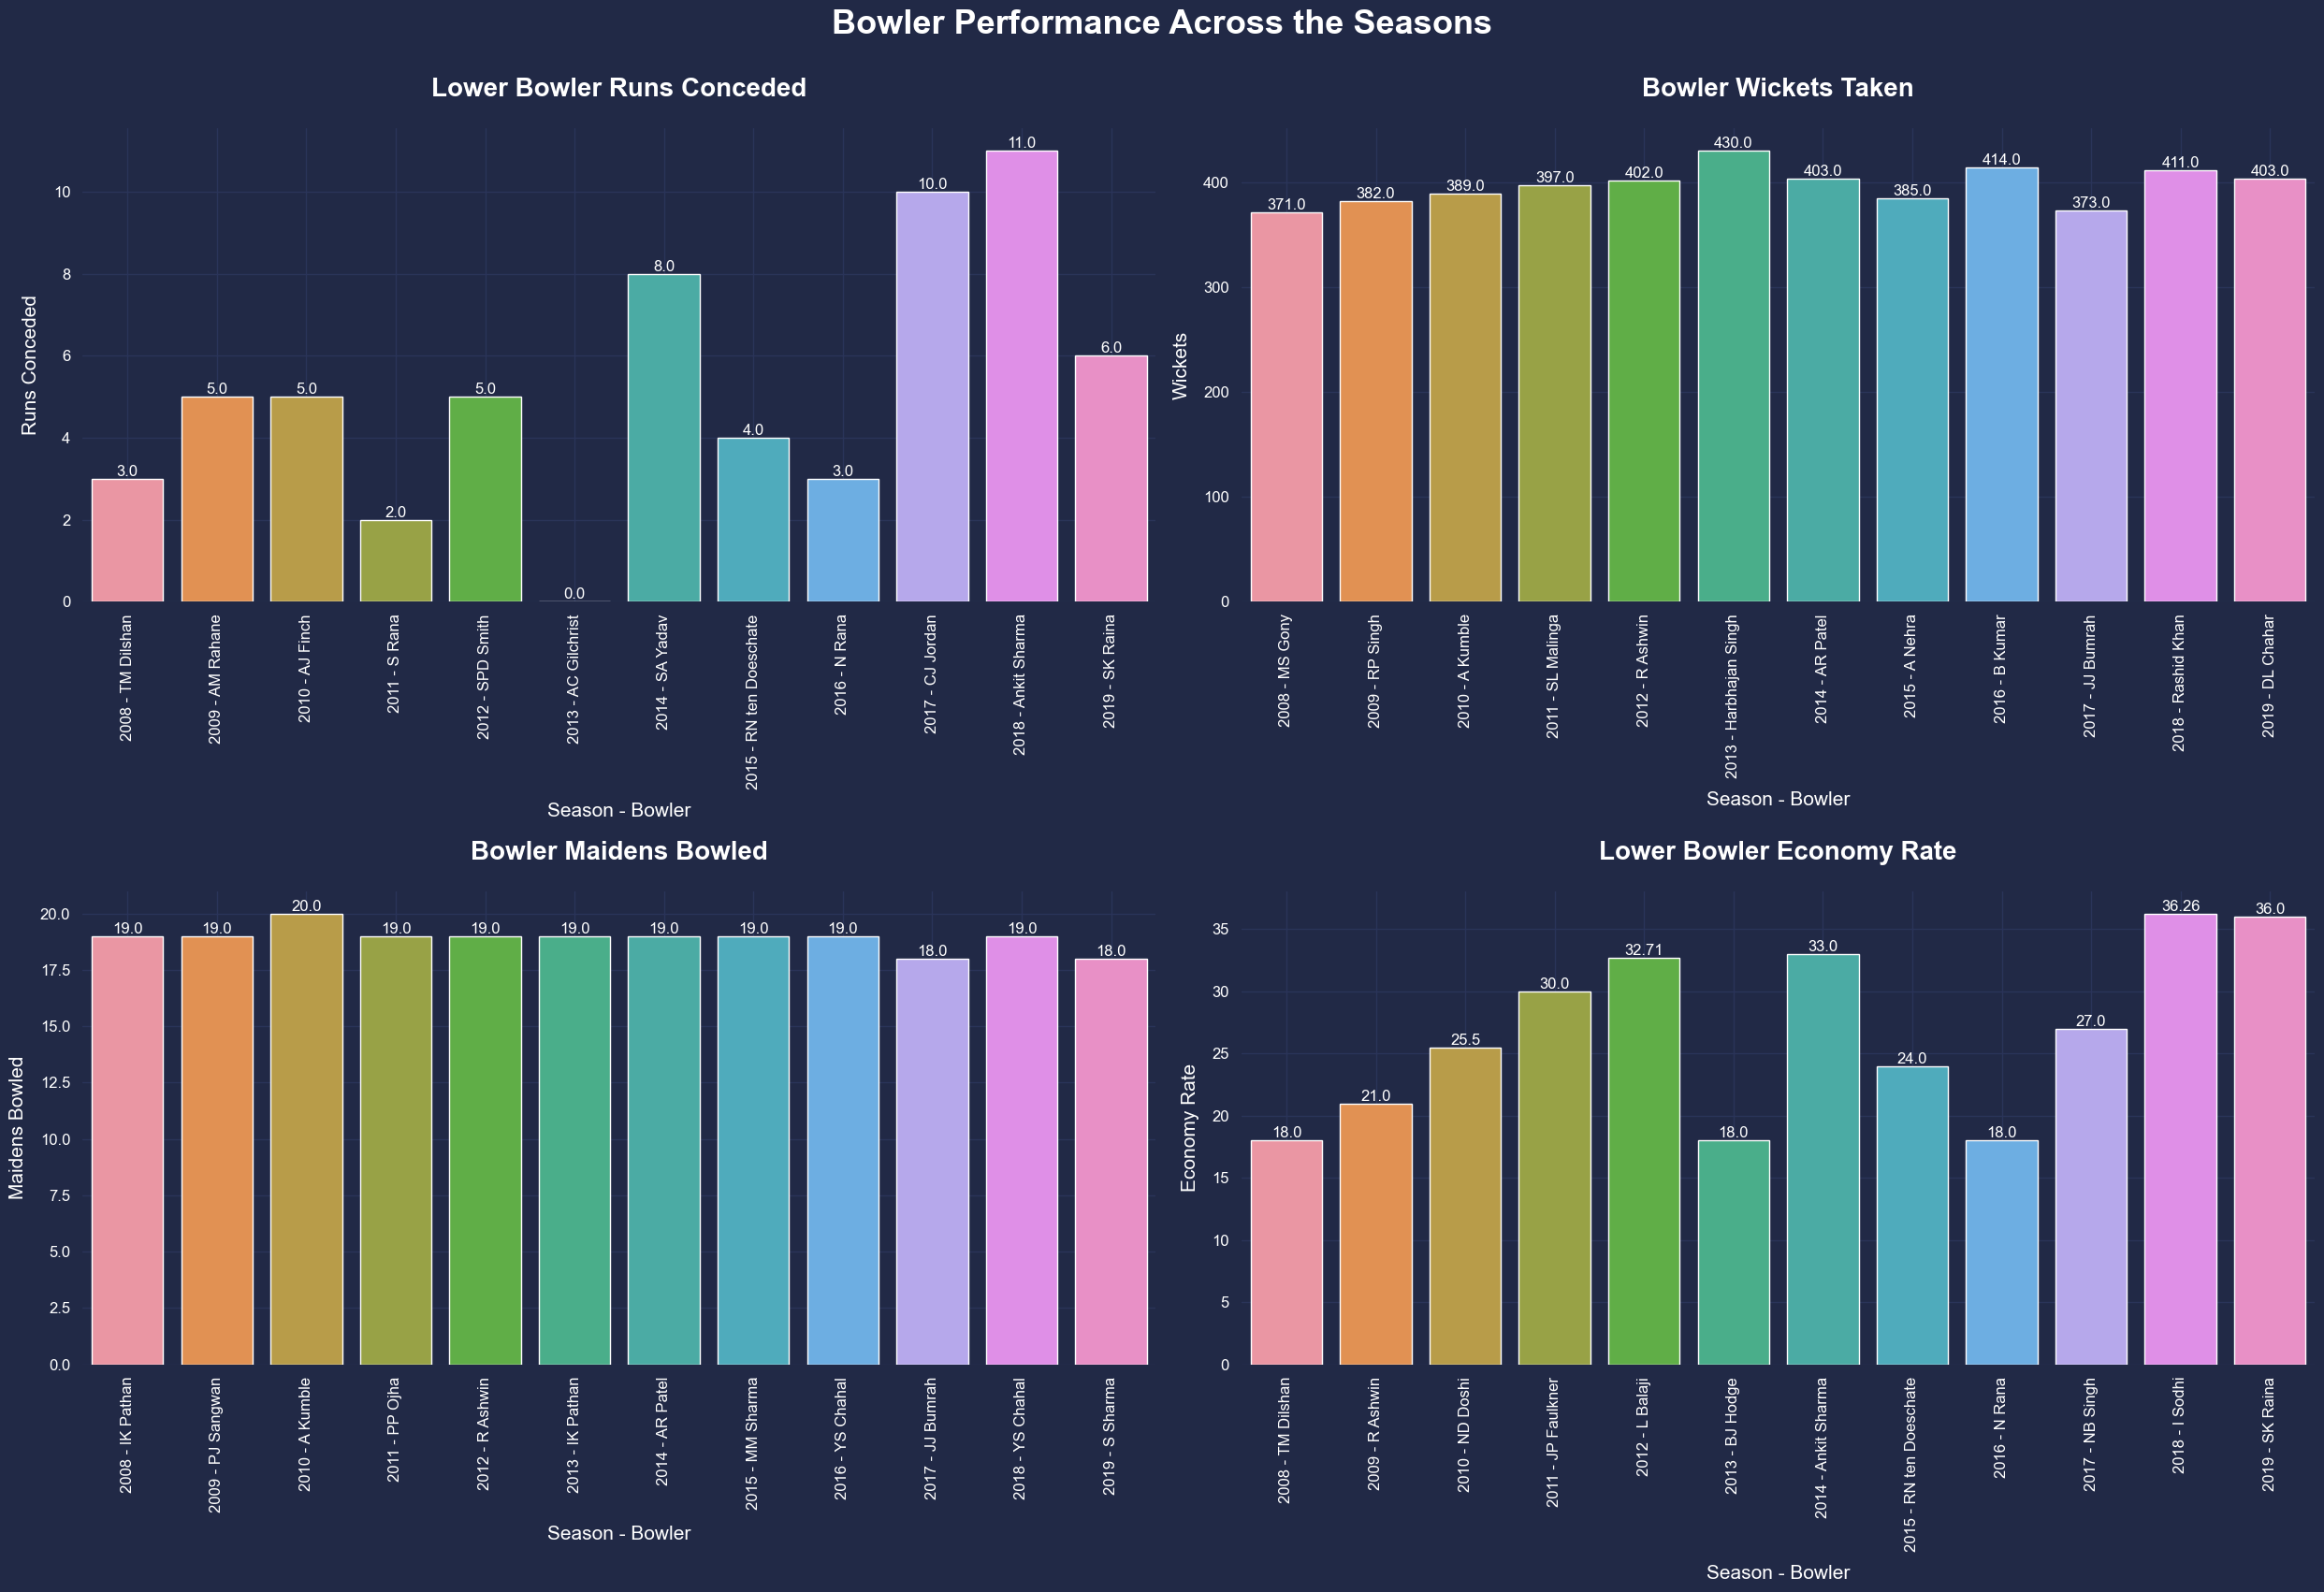

In [77]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,17))
fig.set_facecolor("#212946")

bar_plot(Bowlerruns_df,x_labelsruns,"runs",ax[0,0],"Season - Bowler","Runs Conceded","Lower Bowler Runs Conceded")

# Annotate the bars with their values
for i, patch in enumerate(ax[0,0].patches):
    ax[0,0].annotate(str(round(patch.get_height(), 2)), (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                      ha='center', va='bottom', fontsize=12,color="white",font="Arial")

bar_plot(Bowlerwickets_df,x_labelswickets,"wickets",ax[0,1],"Season - Bowler","Wickets","Bowler Wickets Taken")

# Annotate the bars with their values
for i, patch in enumerate(ax[0,1].patches):
    ax[0,1].annotate(str(round(patch.get_height(), 2)), (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                      ha='center', va='bottom', fontsize=12, color="white",font="Arial")
    
bar_plot(Bowlermaidens_df,x_labelsmaidens,"maidens",ax[1,0],"Season - Bowler","Maidens Bowled","Bowler Maidens Bowled")

# Annotate the bars with their values
for i, patch in enumerate(ax[1,0].patches):
    ax[1,0].annotate(str(round(patch.get_height(), 2)), (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                      ha='center', va='bottom', fontsize=12, color="white",font="Arial")

bar_plot(Bowlereconomy_df,x_labelseconomy,"economy_rate",ax[1,1],"Season - Bowler","Economy Rate","Lower Bowler Economy Rate")


# Annotate the bars with their values
for i, patch in enumerate(ax[1,1].patches):
    ax[1,1].annotate(str(round(patch.get_height(), 2)), (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                      ha='center', va='bottom', fontsize=12, color="white",font="Arial")

fig.suptitle("Bowler Performance Across the Seasons", fontsize=26,y=1.0, color="white",fontweight='bold')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# 9- Batting Team performance 
Going diving into Batting teams to analysis thier performnce and defined weaknesses and strenths to use these useful information to inform team selection(involves choosing the best possible combination of players for a particular match or series based on factors such as form, fitness, playing conditions, opposition strengths and weaknesses, and team balance.), training strategies(to improve the physical, technical, tactical, and mental skills of the players), and game tactics(to achieve their objectives and win matches).


In [78]:
# Create a new column called 'extras_conceded'

BattingTeam_df = indianPL_mat_dliv.groupby(by=['season',"batting_team"]).agg({'total_runs':'sum','player_dismissed':lambda x : x[x!='Not Out'].count(),'batsman_runs': lambda x: (x.sum() / x.count()) * 100}).reset_index()
BattingTeam_df.columns=['season','batting_team','total_runs','total_wickets_lost','batting_strike_rate']
BattingTeam_df['average_runs_per_wicket'] = BattingTeam_df['total_runs'] / BattingTeam_df['total_wickets_lost']
BattingTeam_df['number_of_boundaries'] = indianPL_mat_dliv[indianPL_mat_dliv['batsman_runs'].isin([4, 6])].groupby(by=['season','batting_team'])['batsman_runs'].count().reset_index(drop=True)
BattingTeam_df['extras_conceded'] = indianPL_mat_dliv.groupby(by=['season',"bowling_team"])['extras_conceded'].sum().reset_index(drop=True)
BattingTeam_df.head(5)


season           batting_team  total_runs  total_wickets_lost  \
0    2008    Chennai Super Kings        2520                1874   
1    2008        Deccan Chargers        2229                1668   
2    2008       Delhi Daredevils        2118                1547   
3    2008        Kings XI Punjab        2464                1739   
4    2008  Kolkata Knight Riders        1942                1557   

   batting_strike_rate  average_runs_per_wicket  number_of_boundaries  \
0           126.200640                 1.344717                   330   
1           126.918465                 1.336331                   297   
2           129.282482                 1.369101                   272   
3           134.560092                 1.416906                   326   
4           115.671162                 1.247270                   238   

   extras_conceded  
0              160  
1              145  
2              118  
3              142  
4              152

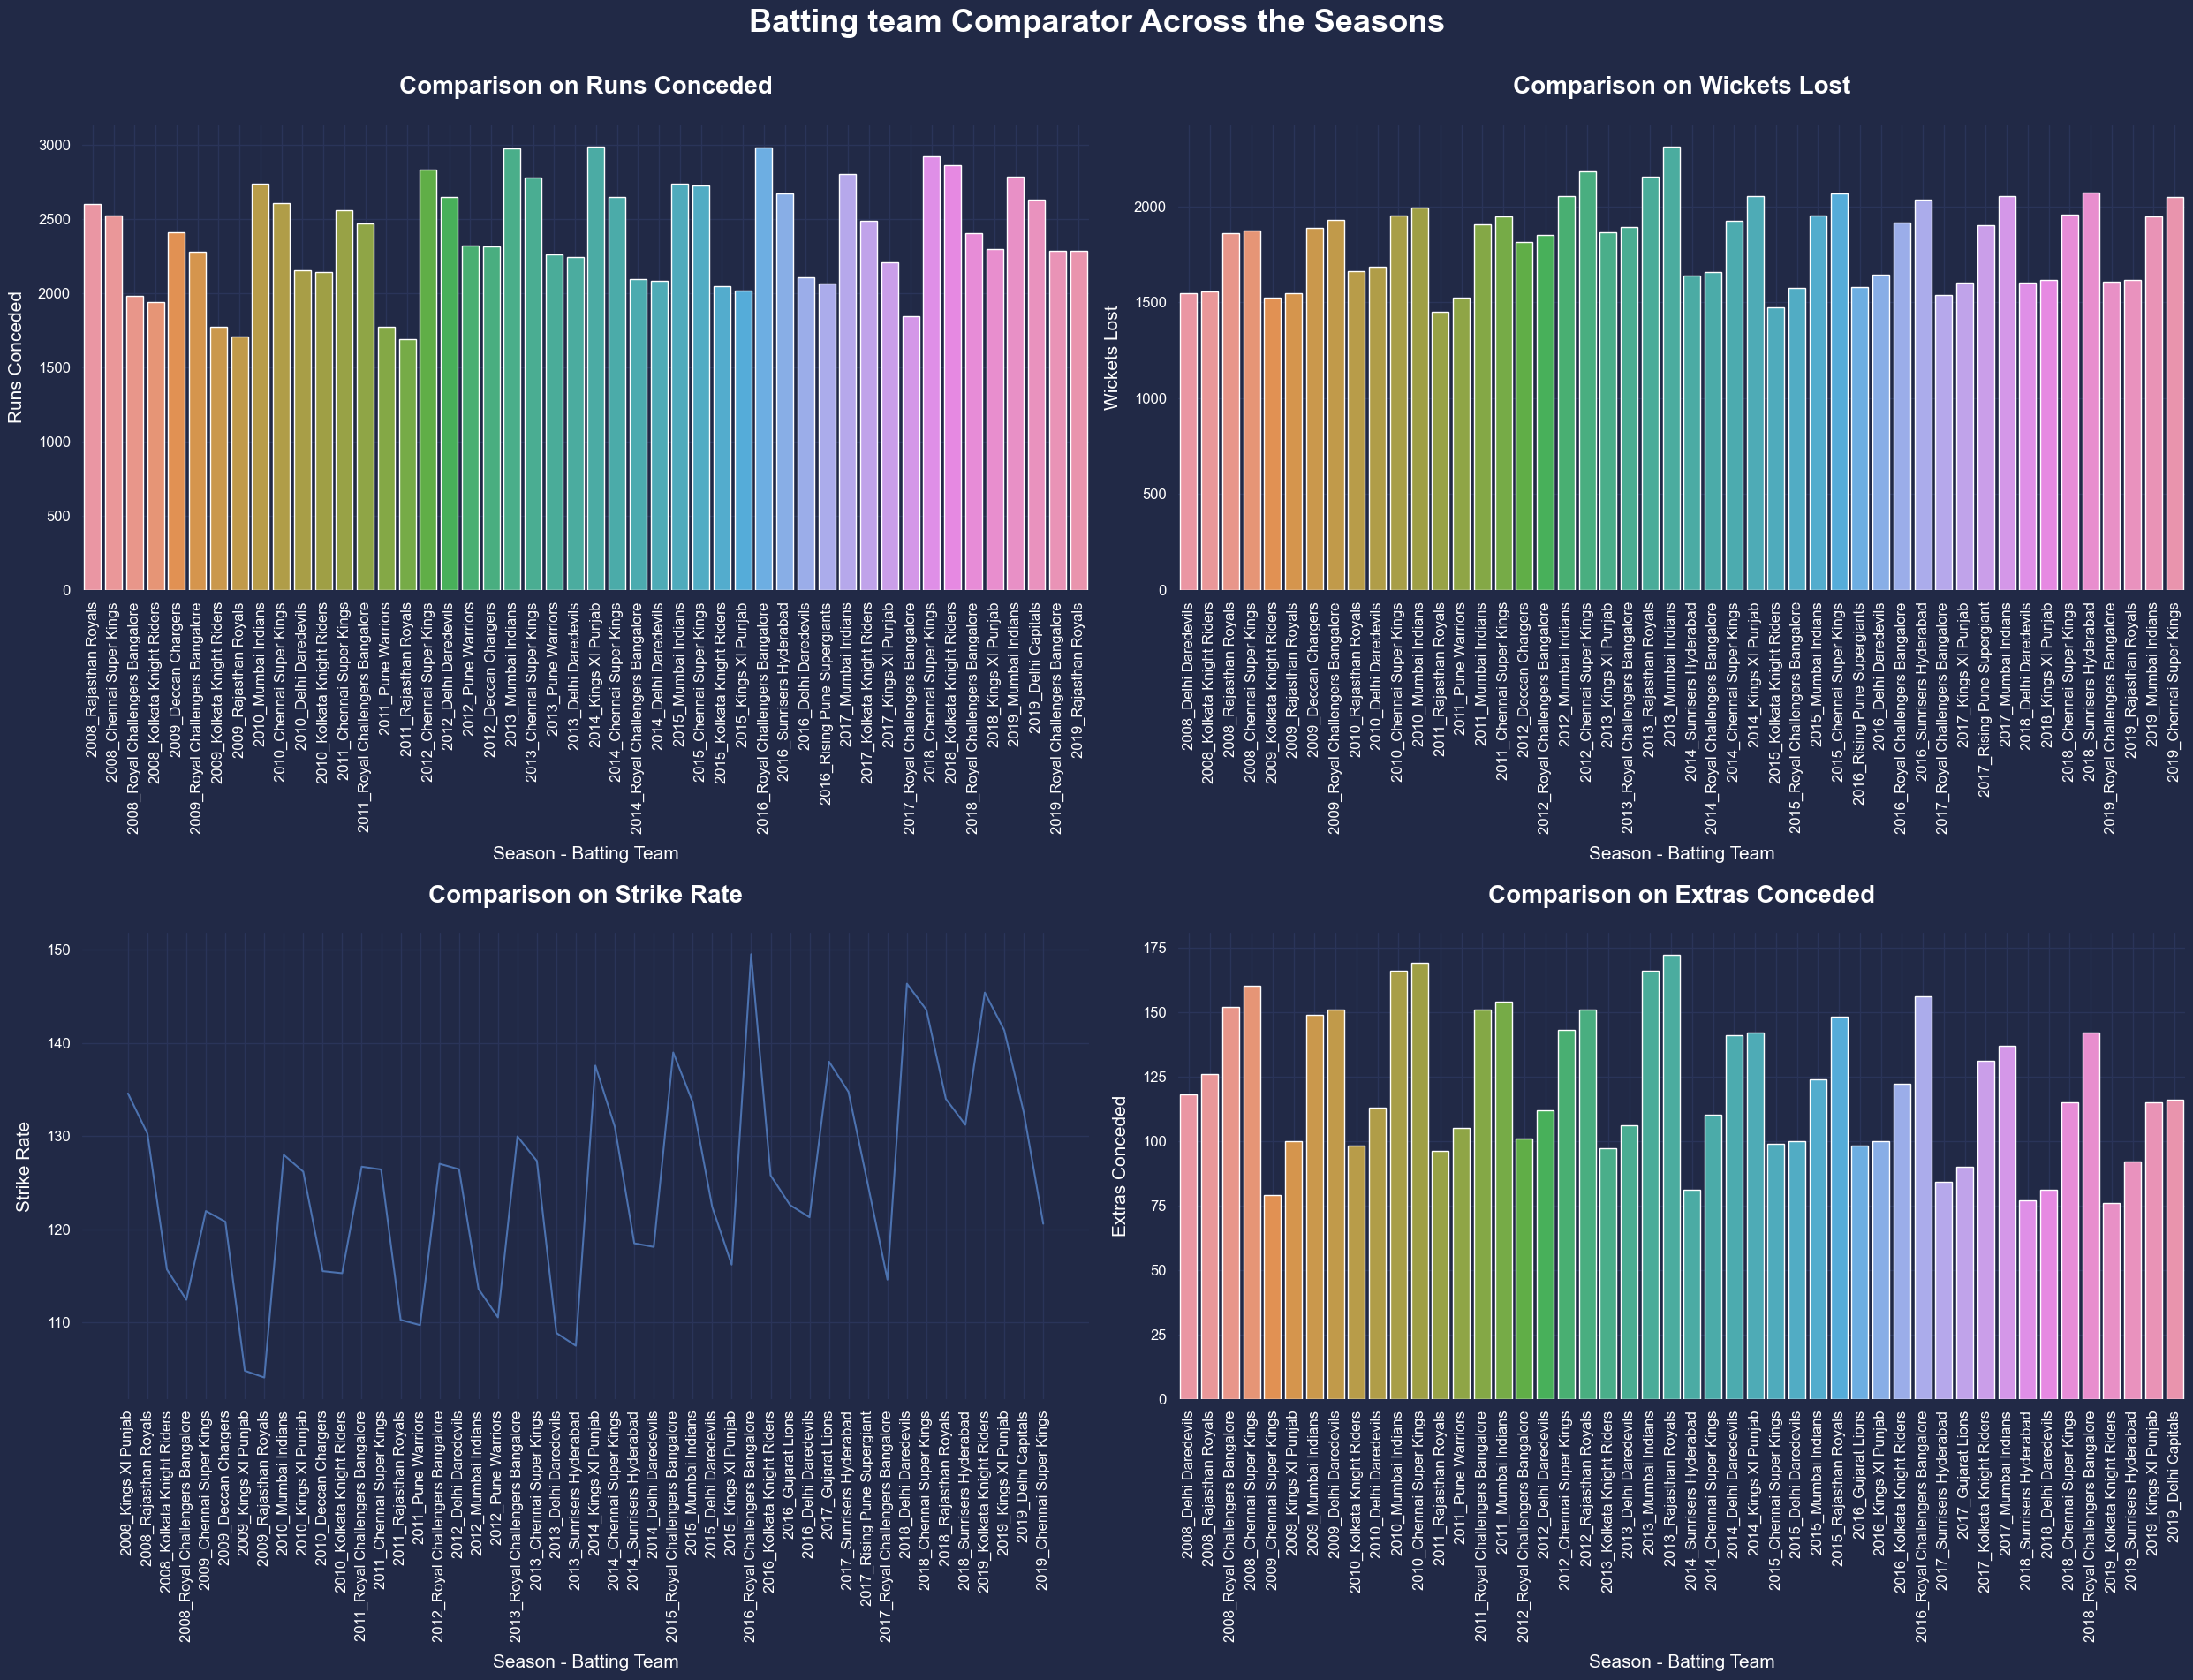

In [79]:
compareRuns_batsmen = BattingTeam_df.groupby('season').apply(lambda x: pd.concat([x.sort_values('total_runs', ascending=False).head(2), x.sort_values('total_runs', ascending=False).tail(2)])).reset_index(drop=True)
compareRuns_batsmen['season_team'] = compareRuns_batsmen['season'].astype(str) + '_' + compareRuns_batsmen['batting_team']

compareWickets_batsmen = BattingTeam_df.groupby('season').apply(lambda x: pd.concat([x.sort_values('total_wickets_lost', ascending=True).head(2), x.sort_values('total_wickets_lost', ascending=True).tail(2)])).reset_index(drop=True)
compareWickets_batsmen['season_team'] = compareWickets_batsmen['season'].astype(str) + '_' + compareWickets_batsmen['batting_team']

compareStrike_batsmen = BattingTeam_df.groupby('season').apply(lambda x: pd.concat([x.sort_values('batting_strike_rate', ascending=False).head(2), x.sort_values('batting_strike_rate', ascending=False).tail(2)])).reset_index(drop=True)
compareStrike_batsmen['season_team'] = compareStrike_batsmen['season'].astype(str) + '_' + compareStrike_batsmen['batting_team']

compareExtras_batsmen = BattingTeam_df.groupby('season').apply(lambda x: pd.concat([x.sort_values('extras_conceded', ascending=True).head(2), x.sort_values('extras_conceded', ascending=True).tail(2)])).reset_index(drop=True)
compareExtras_batsmen['season_team'] = compareExtras_batsmen['season'].astype(str) + '_' + compareExtras_batsmen['batting_team']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,19))
fig.set_facecolor("#212946")

bar_plot(compareRuns_batsmen,'season_team',"total_runs",ax[0,0],"Season - Batting Team","Runs Conceded","Comparison on Runs Conceded")

bar_plot(compareWickets_batsmen,'season_team',"total_wickets_lost",ax[0,1],"Season - Batting Team","Wickets Lost","Comparison on Wickets Lost")

line_plot(compareStrike_batsmen,'season_team','batting_strike_rate',ax[1,0],"Season - Batting Team","Strike Rate","Comparison on Strike Rate")

bar_plot(compareExtras_batsmen,'season_team',"extras_conceded",ax[1,1],"Season - Batting Team","Extras Conceded","Comparison on Extras Conceded")

fig.suptitle("Batting team Comparator Across the Seasons", fontsize=26,y=1.0,  color="white",fontweight='bold')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()





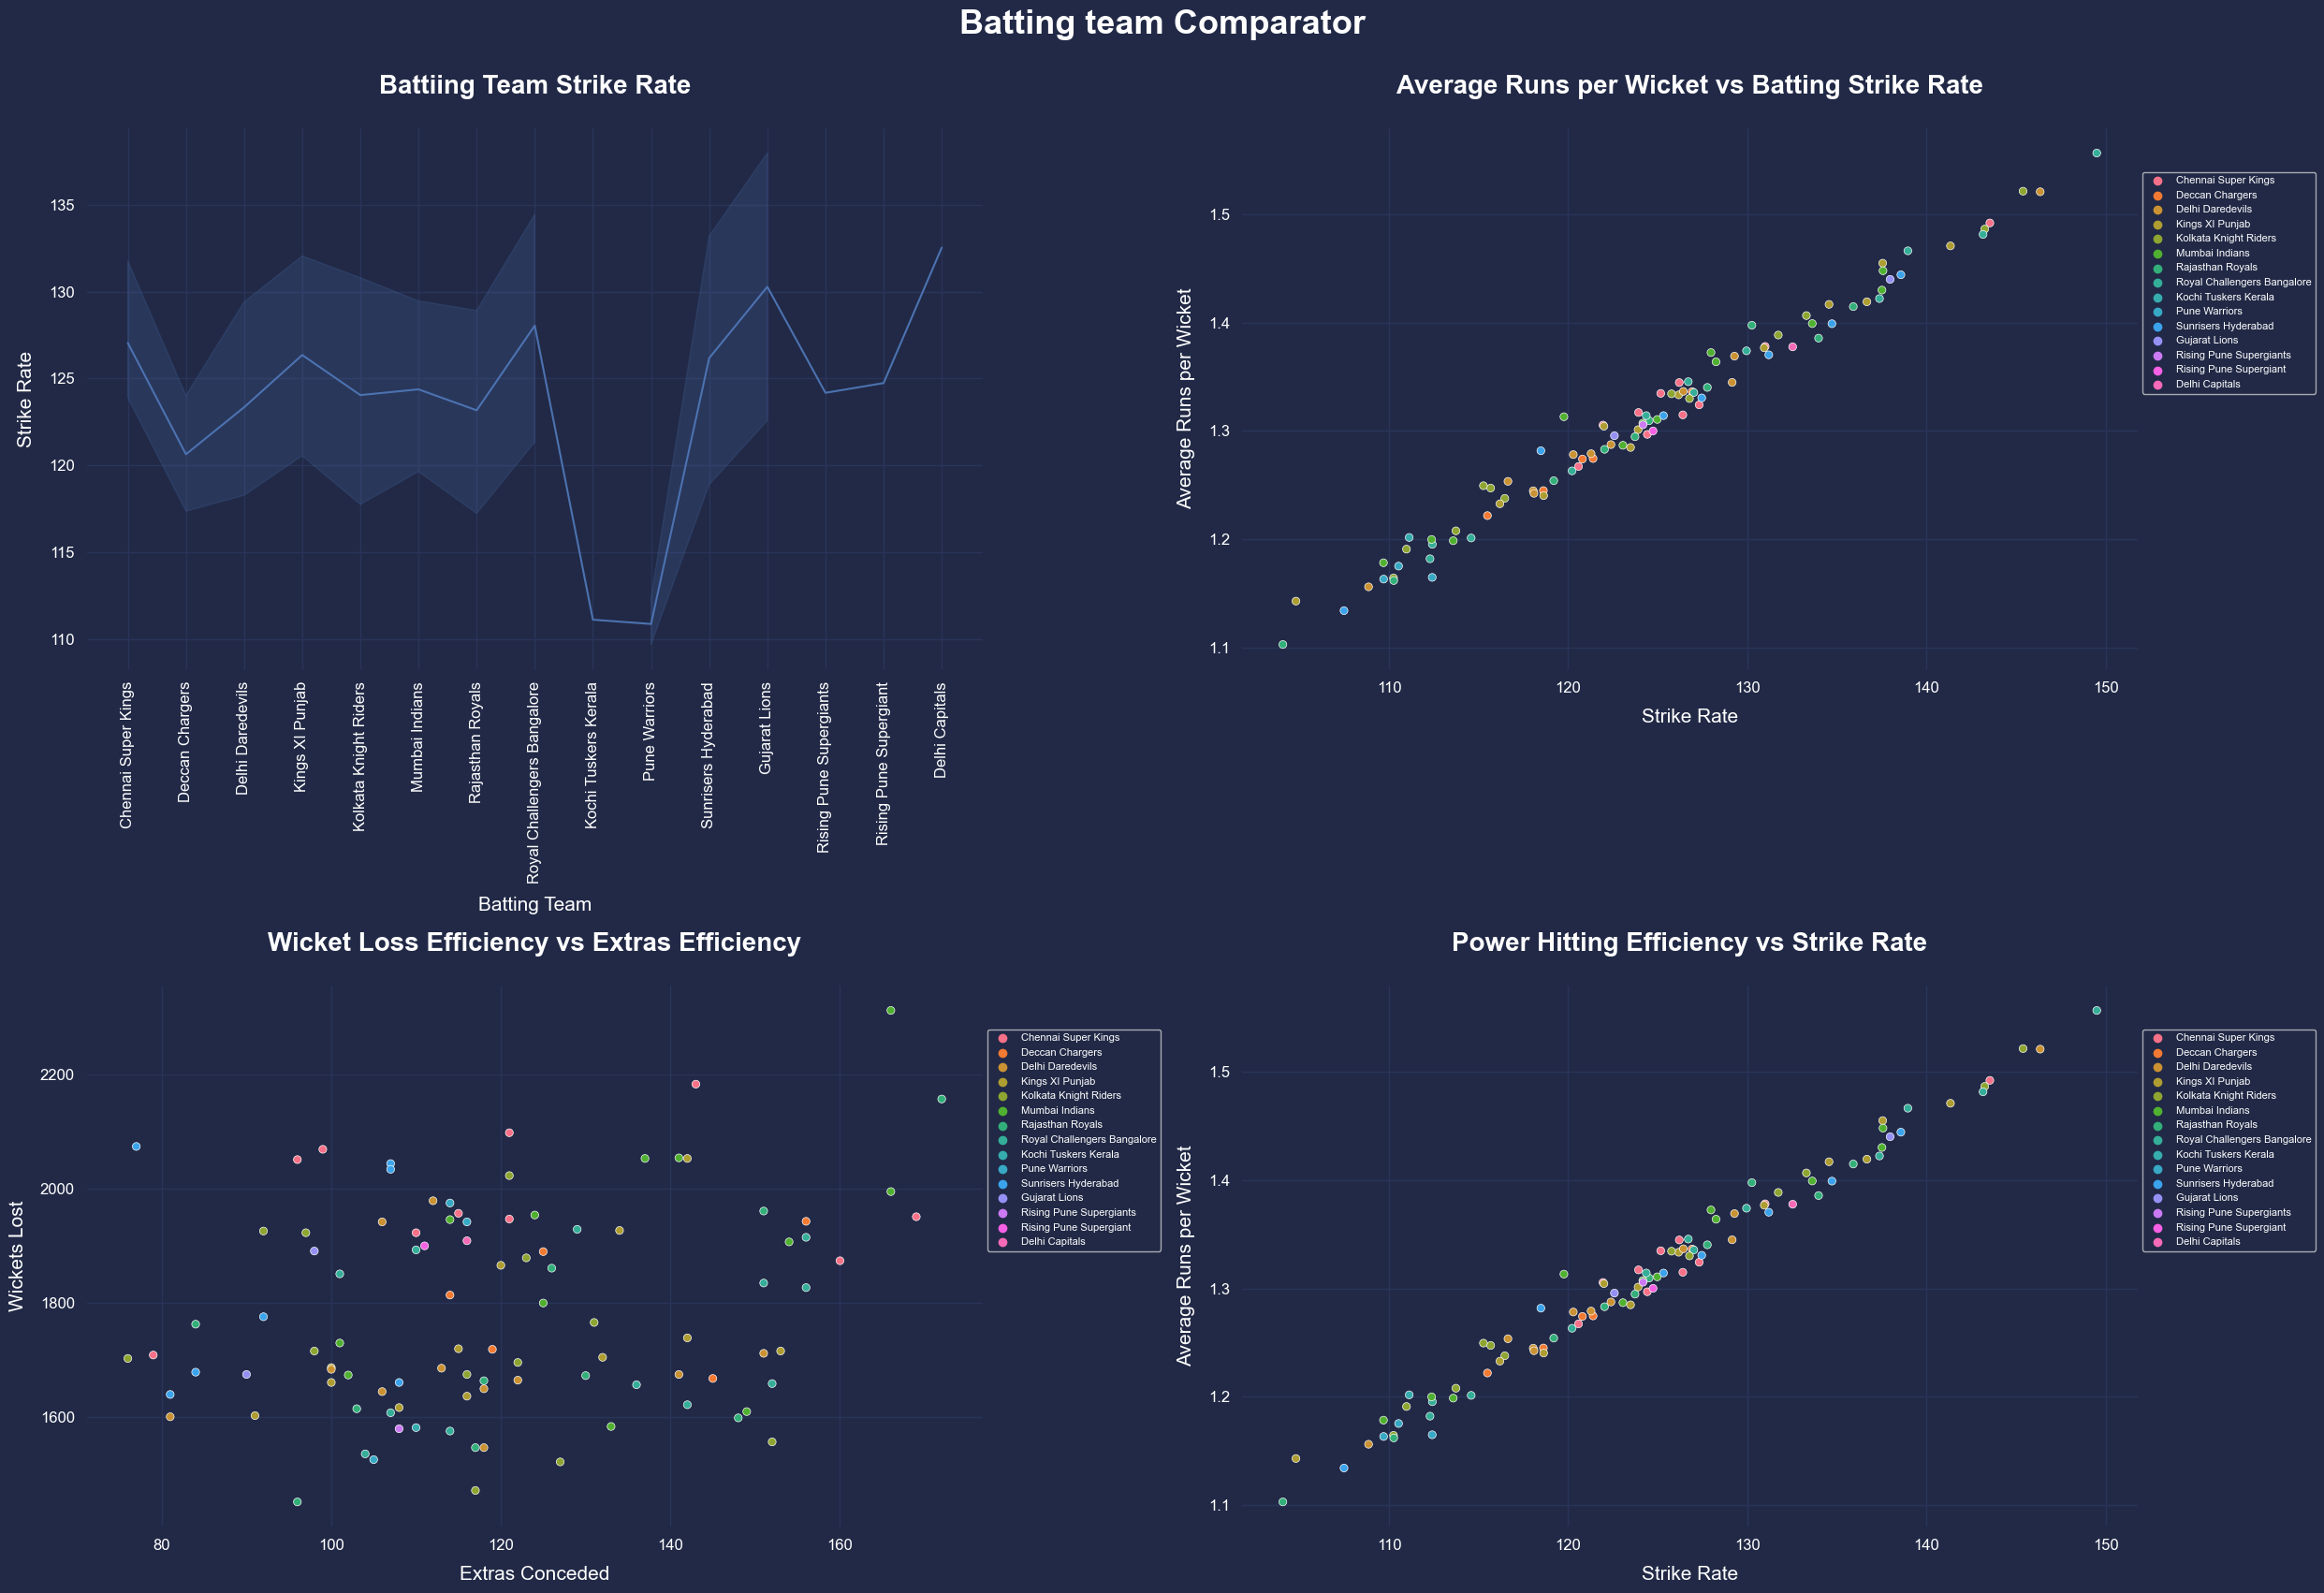

In [80]:


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,17))
fig.set_facecolor("#212946")

line_plot(BattingTeam_df,'batting_team','batting_strike_rate',ax[0,0],"Batting Team","Strike Rate","Battiing Team Strike Rate")

scatter_plot(BattingTeam_df,'batting_strike_rate','average_runs_per_wicket',ax[0,1],'batting_team',"Strike Rate","Average Runs per Wicket","Average Runs per Wicket vs Batting Strike Rate")

scatter_plot(BattingTeam_df,'extras_conceded','total_wickets_lost',ax[1,0],'batting_team',"Extras Conceded","Wickets Lost","Wicket Loss Efficiency vs Extras Efficiency")

scatter_plot(BattingTeam_df,'batting_strike_rate','average_runs_per_wicket',ax[1,1],'batting_team',"Strike Rate","Average Runs per Wicket","Power Hitting Efficiency vs Strike Rate")

fig.suptitle("Batting team Comparator", fontsize=26,y=1.0, color="white",fontweight='bold')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


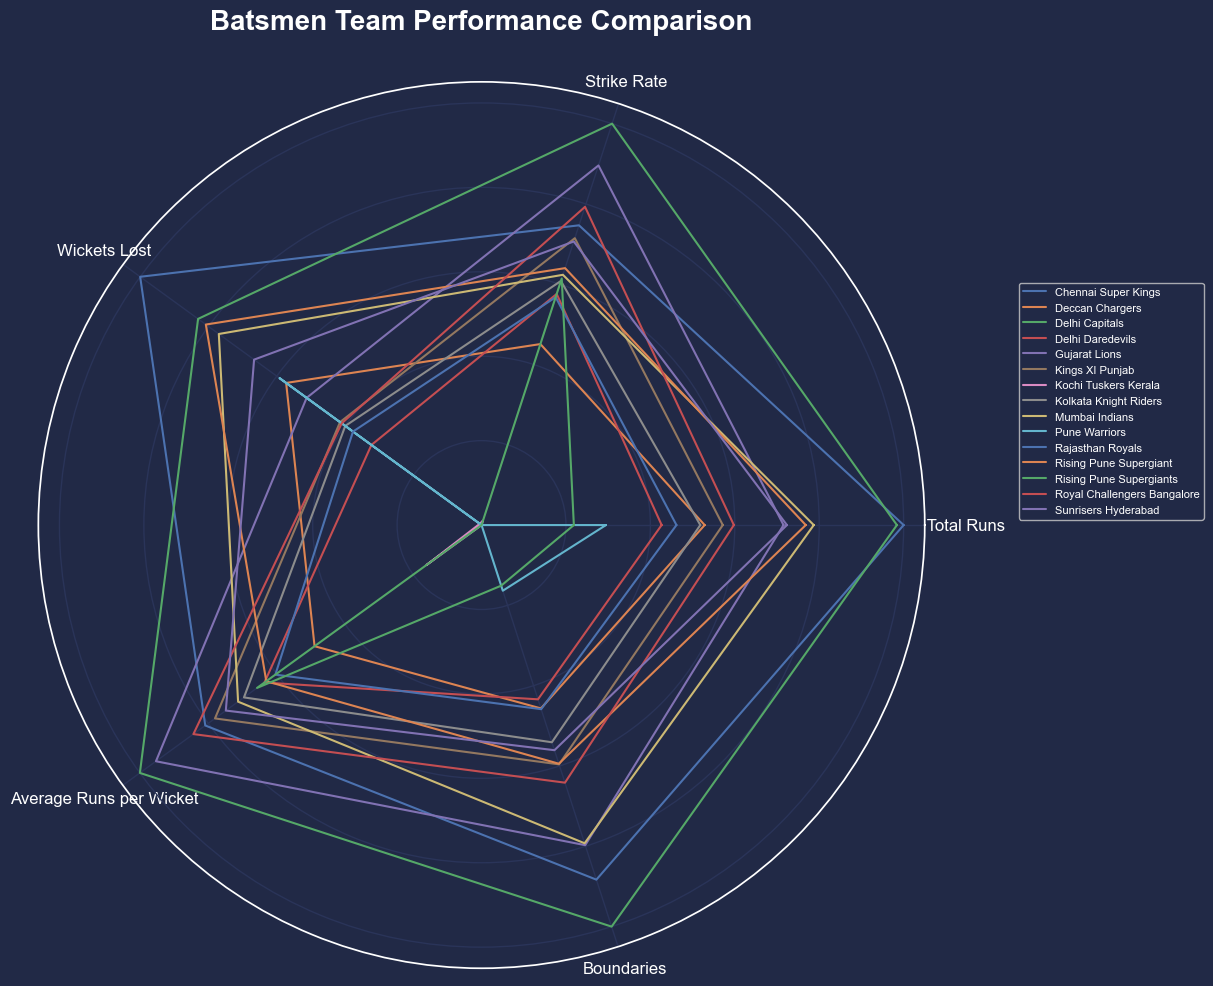

In [98]:
# Group the data by batsman
batsman_data = BattingTeam_df.groupby(by='batting_team')[['batting_team', 'total_runs', 'batting_strike_rate', 'total_wickets_lost','average_runs_per_wicket','number_of_boundaries']].mean().reset_index()
# Normalize the data to a scale of 0-1
numbat_cols = ['total_runs', 'batting_strike_rate', 'total_wickets_lost','average_runs_per_wicket','number_of_boundaries']
batsman_data[numbat_cols] = (batsman_data[numbat_cols] - batsman_data[numbat_cols].min()) / (batsman_data[numbat_cols].max() - batsman_data[numbat_cols].min())

# Plot the radar chart
anglesbat = [n / float(len(numbat_cols)) * 2 * 3.141 for n in range(len(numbat_cols))]
anglesbat += anglesbat[:1]
figbat = plt.figure(figsize=(12, 10))
figbat.set_facecolor("#212946")

axbat = figbat.add_subplot(111, polar=True)
for i, row in batsman_data.iterrows():
    
        values = row[numbat_cols].tolist()
        values += [values[0]]
        axbat.plot(anglesbat, values, label=i)

# Add title and axis labels
axbat.set_title('Batsmen Team Performance Comparison', fontsize=20, fontweight='bold', color="white", y=1.05)
axbat.set_xticks(anglesbat[:-1])
axbat.set_xticklabels(['        Total Runs','Strike Rate','Wickets Lost','Average Runs per Wicket','Boundaries'], fontsize=12, color="white",font="Arial")
axbat.set_yticklabels([])
axbat.grid(color='#2A3459')
axbat.set_facecolor("#212946")
# Update the legend with batsman names
handlesbat, labelsbat = axbat.get_legend_handles_labels()
labelsbat = batsman_data['batting_team'].tolist()
axbat.legend(handlesbat, labelsbat, loc='lower left', bbox_to_anchor=(1.1, 0.5),fontsize=8, facecolor='#212946', labelcolor='white')
plt.tight_layout()

plt.show()

# 10- Bowling Team performance
After gain insights of performnace of batting teams, going forward to do the same with bowling teams performance 

In [82]:
BowlerTeam_df = indianPL_mat_dliv.groupby(by=['season','bowling_team']).agg({'total_runs':'sum','player_dismissed':lambda x : x[x!='Not Out'].count()}).reset_index()
BowlerTeam_df.columns=['season','bowling_team','total_runs','wickets_taken']
BowlerTeam_df['bowling_average'] = BowlerTeam_df['total_runs']/ BowlerTeam_df['wickets_taken']
balls_bowled = indianPL_mat_dliv.groupby(['bowling_team', 'bowler']).size().reset_index(name='balls_bowled')
overs_bowled = balls_bowled['balls_bowled'] / 6
BowlerTeam_df['economy_rate']= BowlerTeam_df['total_runs']/overs_bowled
BowlerTeam_df['bowling_strike_rate']= balls_bowled['balls_bowled']/ BowlerTeam_df['wickets_taken']

BowlerTeam_df.head(5)


season           bowling_team  total_runs  wickets_taken  bowling_average  \
0    2008    Chennai Super Kings        2568           1908         1.345912   
1    2008        Deccan Chargers        2307           1653         1.395644   
2    2008       Delhi Daredevils        2223           1660         1.339157   
3    2008        Kings XI Punjab        2417           1769         1.366309   
4    2008  Kolkata Knight Riders        1718           1350         1.272593   

   economy_rate  bowling_strike_rate  
0    233.454545             0.034591  
1     28.958159             0.289171  
2    533.520000             0.015060  
3    322.266667             0.025438  
4     26.430769             0.288889

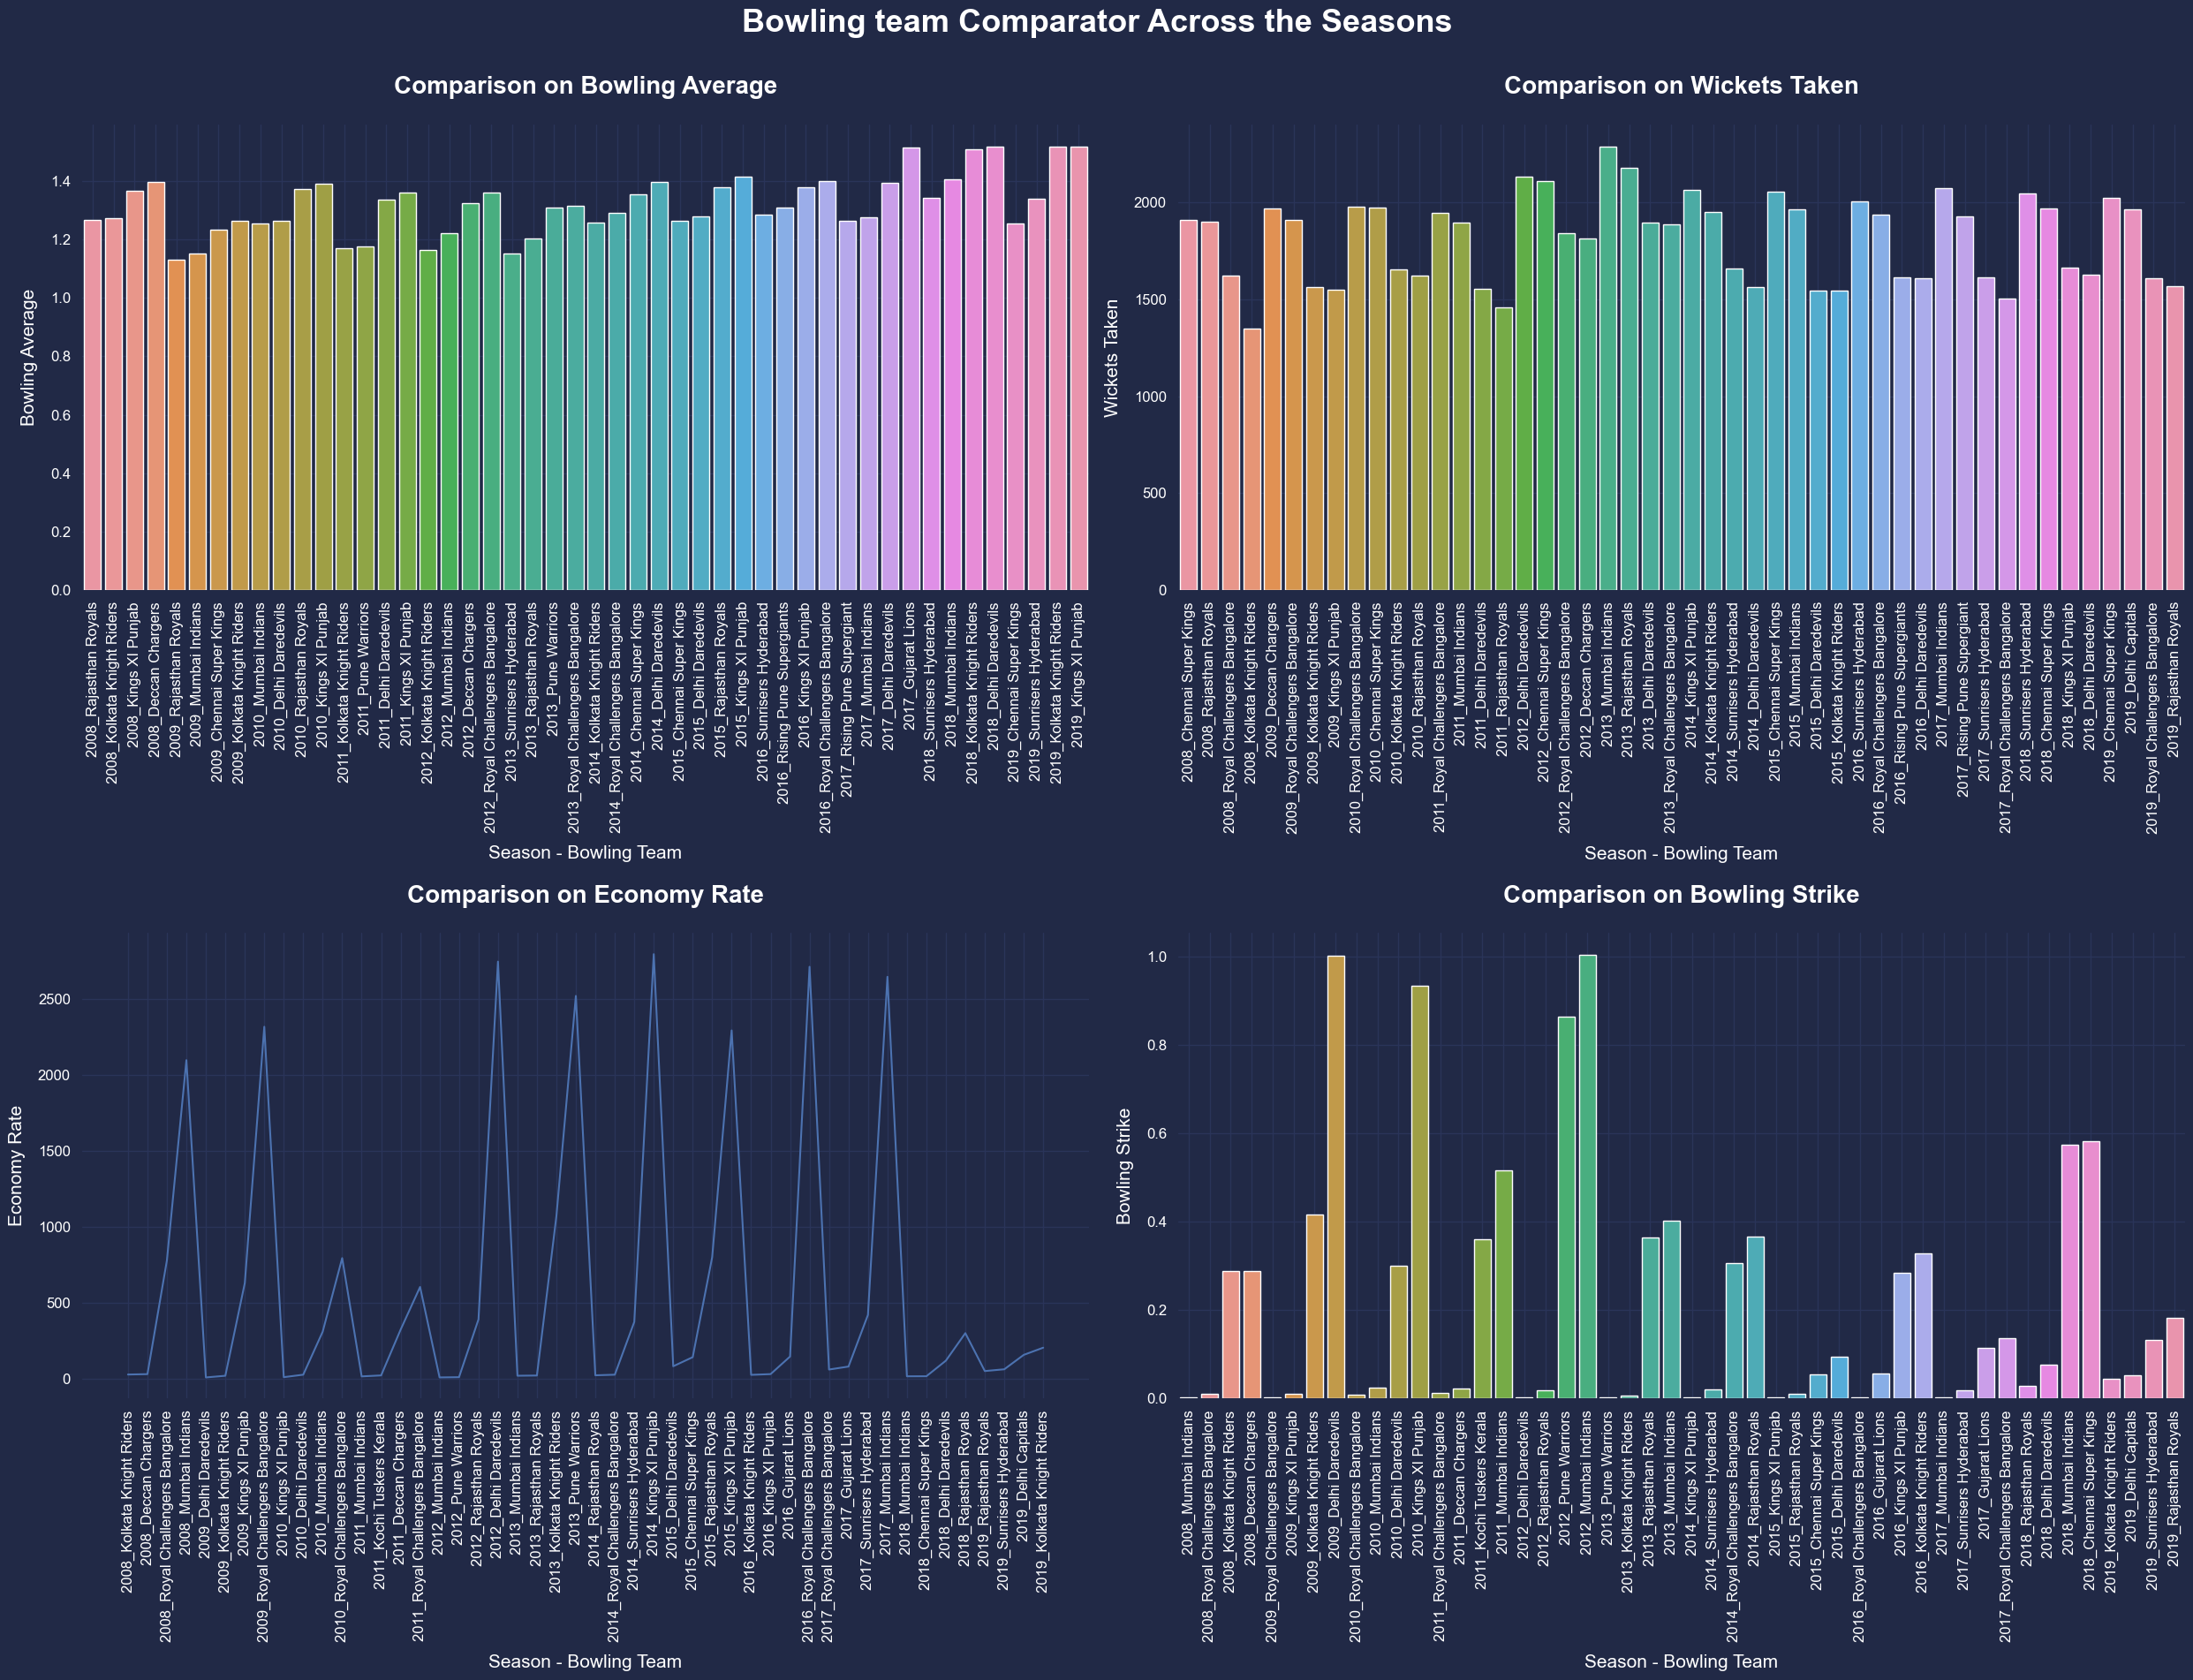

In [83]:
compareBowling_bowler = BowlerTeam_df.groupby('season').apply(lambda x: pd.concat([x.sort_values('bowling_average', ascending=True).head(2), x.sort_values('bowling_average', ascending=True).tail(2)])).reset_index(drop=True)
compareBowling_bowler['season_team'] = compareBowling_bowler['season'].astype(str) + '_' + compareBowling_bowler['bowling_team']

compareWickets_bowler = BowlerTeam_df.groupby('season').apply(lambda x: pd.concat([x.sort_values('wickets_taken', ascending=False).head(2), x.sort_values('wickets_taken', ascending=False).tail(2)])).reset_index(drop=True)
compareWickets_bowler['season_team'] = compareWickets_bowler['season'].astype(str) + '_' + compareWickets_bowler['bowling_team']

compareEconomy_bowler = BowlerTeam_df.groupby('season').apply(lambda x: pd.concat([x.sort_values('economy_rate', ascending=True).head(2), x.sort_values('economy_rate', ascending=True).tail(2)])).reset_index(drop=True)
compareEconomy_bowler['season_team'] = compareEconomy_bowler['season'].astype(str) + '_' + compareEconomy_bowler['bowling_team']

compareStrike_bowler = BowlerTeam_df.groupby('season').apply(lambda x: pd.concat([x.sort_values('bowling_strike_rate', ascending=True).head(2), x.sort_values('bowling_strike_rate', ascending=True).tail(2)])).reset_index(drop=True)
compareStrike_bowler['season_team'] = compareStrike_bowler['season'].astype(str) + '_' + compareStrike_bowler['bowling_team']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,19))
fig.set_facecolor("#212946")

bar_plot(compareBowling_bowler,'season_team',"bowling_average",ax[0,0],"Season - Bowling Team","Bowling Average","Comparison on Bowling Average")

bar_plot(compareWickets_bowler,'season_team',"wickets_taken",ax[0,1],"Season - Bowling Team","Wickets Taken","Comparison on Wickets Taken")

line_plot(compareEconomy_bowler,'season_team','economy_rate',ax[1,0],"Season - Bowling Team","Economy Rate","Comparison on Economy Rate")

bar_plot(compareStrike_bowler,'season_team',"bowling_strike_rate",ax[1,1],"Season - Bowling Team","Bowling Strike","Comparison on Bowling Strike")

fig.suptitle("Bowling team Comparator Across the Seasons", fontsize=26,y=1.0, color="white",fontweight='bold')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

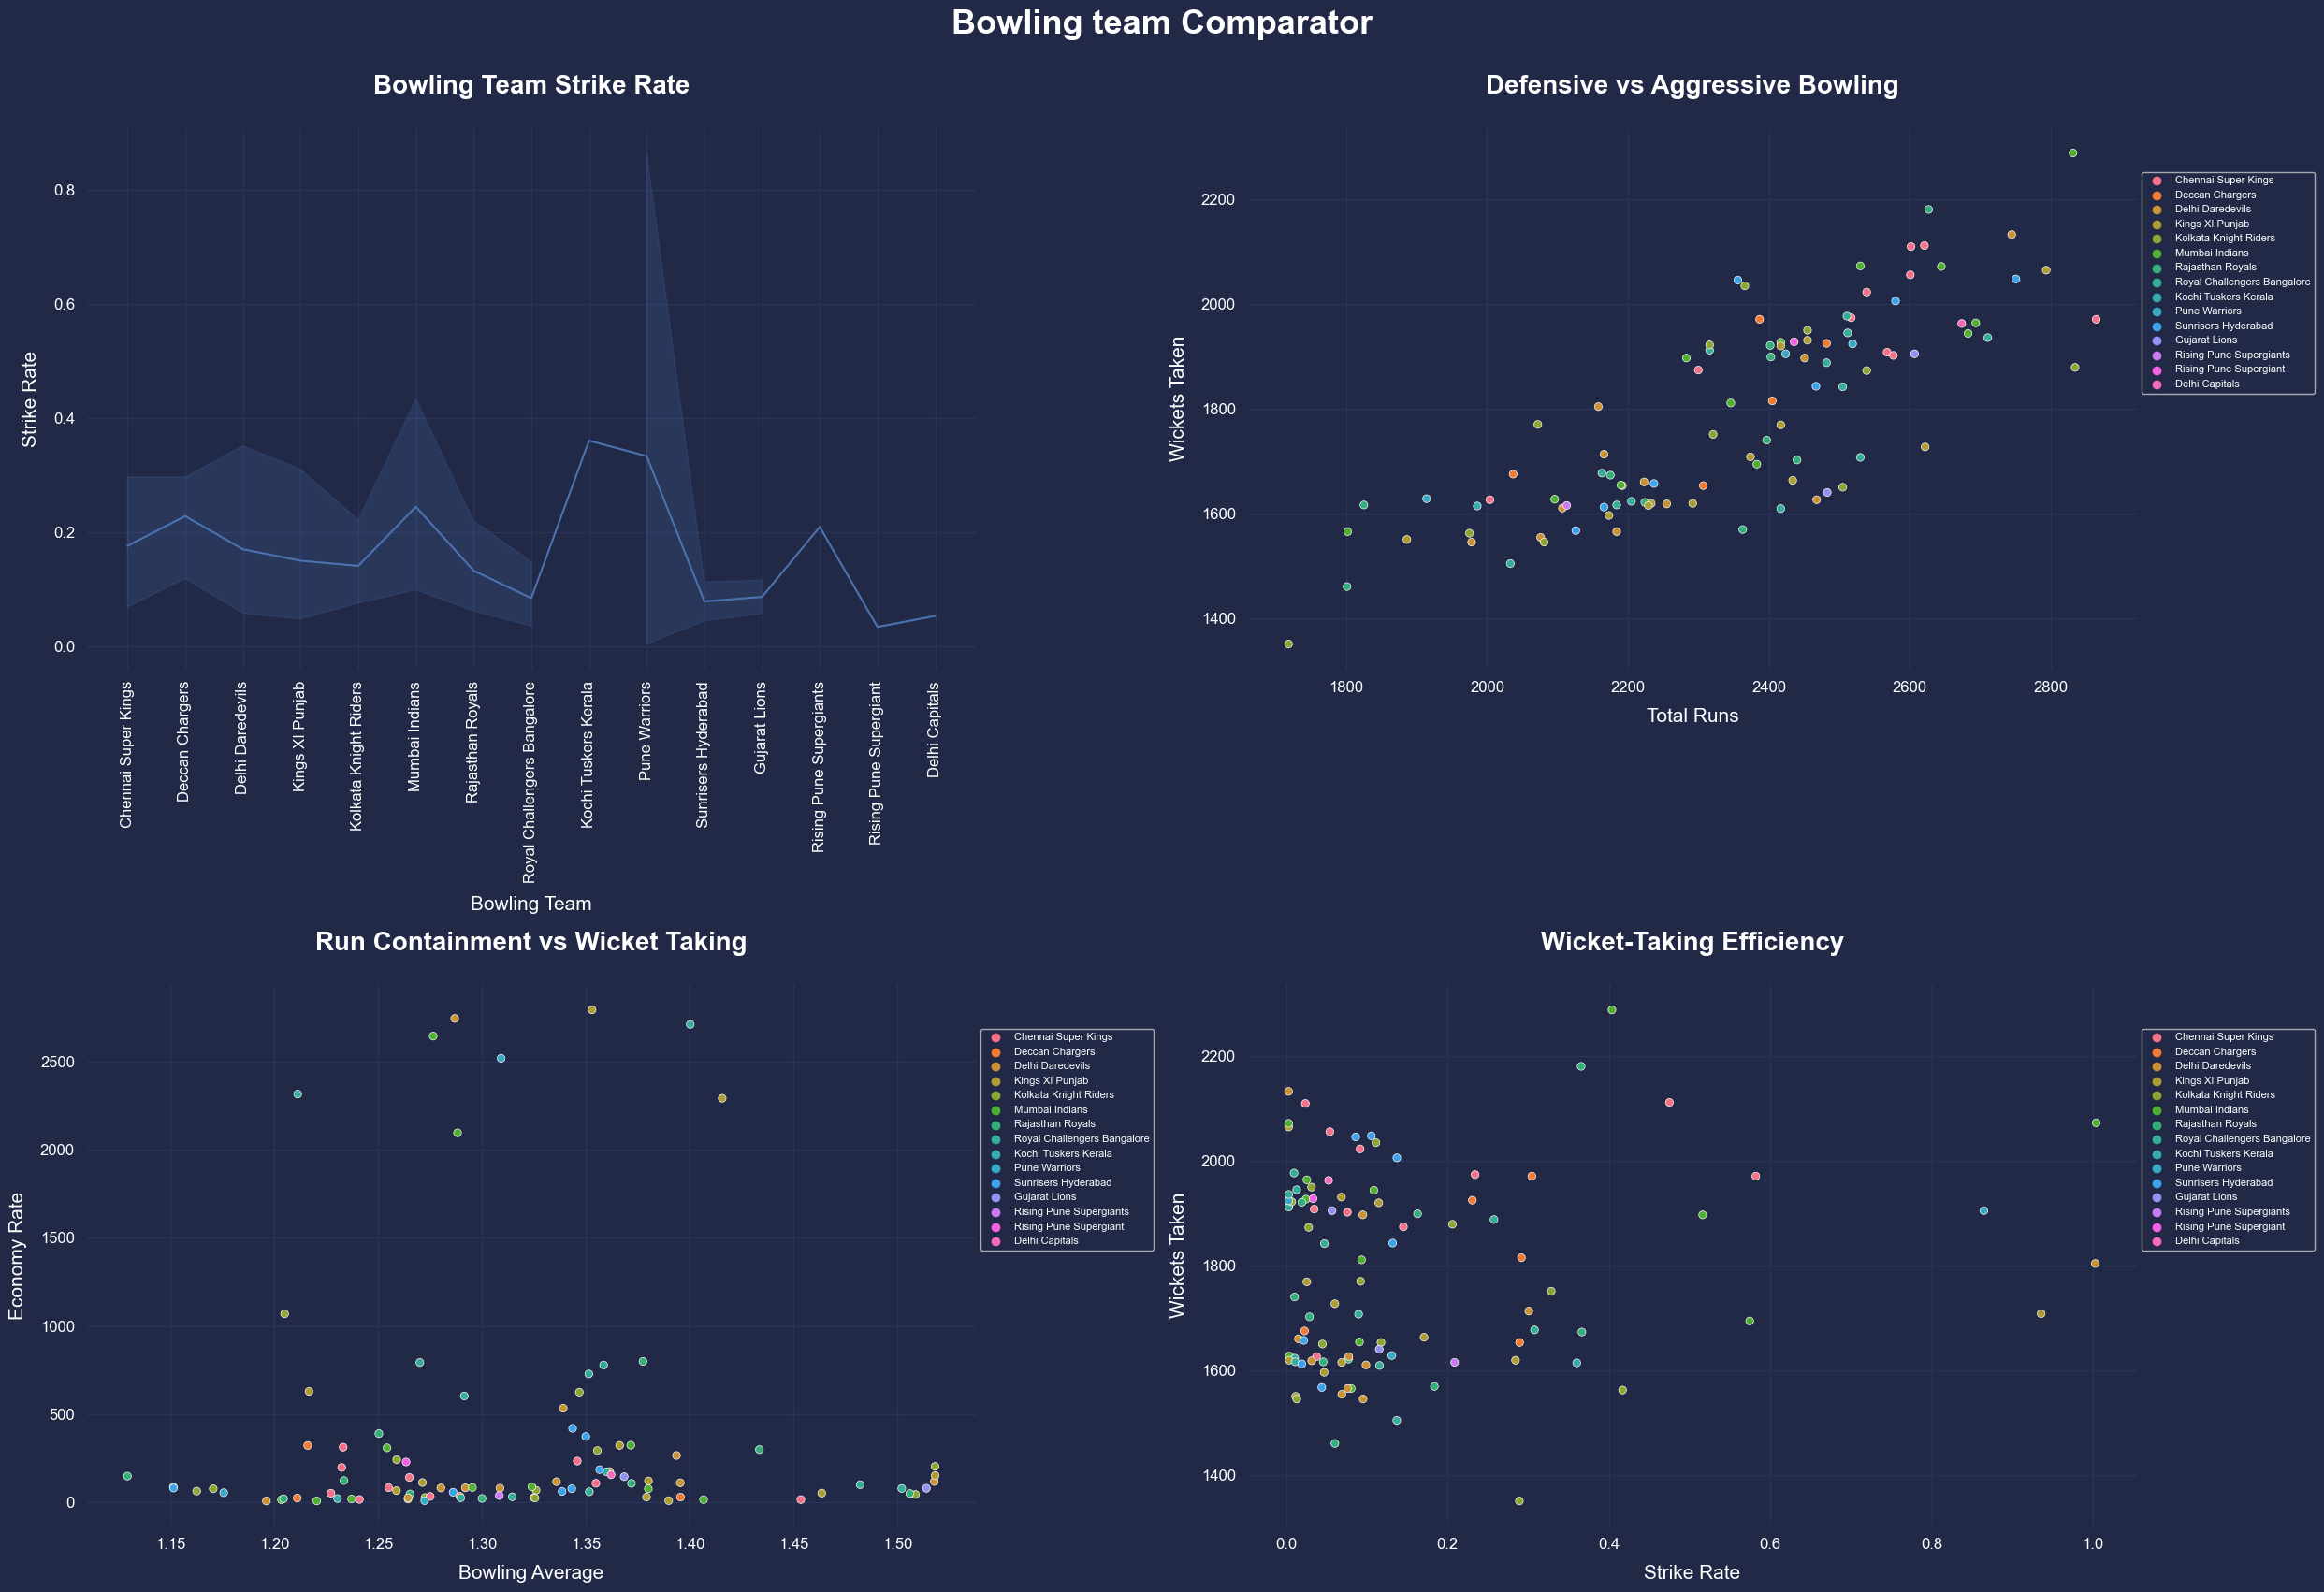

In [84]:


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,17))
fig.set_facecolor("#212946")

line_plot(BowlerTeam_df,'bowling_team','bowling_strike_rate',ax[0,0],"Bowling Team","Strike Rate","Bowling Team Strike Rate")

scatter_plot(BowlerTeam_df,'total_runs','wickets_taken',ax[0,1],'bowling_team',"Total Runs","Wickets Taken","Defensive vs Aggressive Bowling")

scatter_plot(BowlerTeam_df,'bowling_average','economy_rate',ax[1,0],'bowling_team',"Bowling Average","Economy Rate","Run Containment vs Wicket Taking")

scatter_plot(BowlerTeam_df,'bowling_strike_rate','wickets_taken',ax[1,1],'bowling_team',"Strike Rate","Wickets Taken","Wicket-Taking Efficiency")

fig.suptitle("Bowling team Comparator", fontsize=26,y=1.0, color="white",fontweight='bold')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

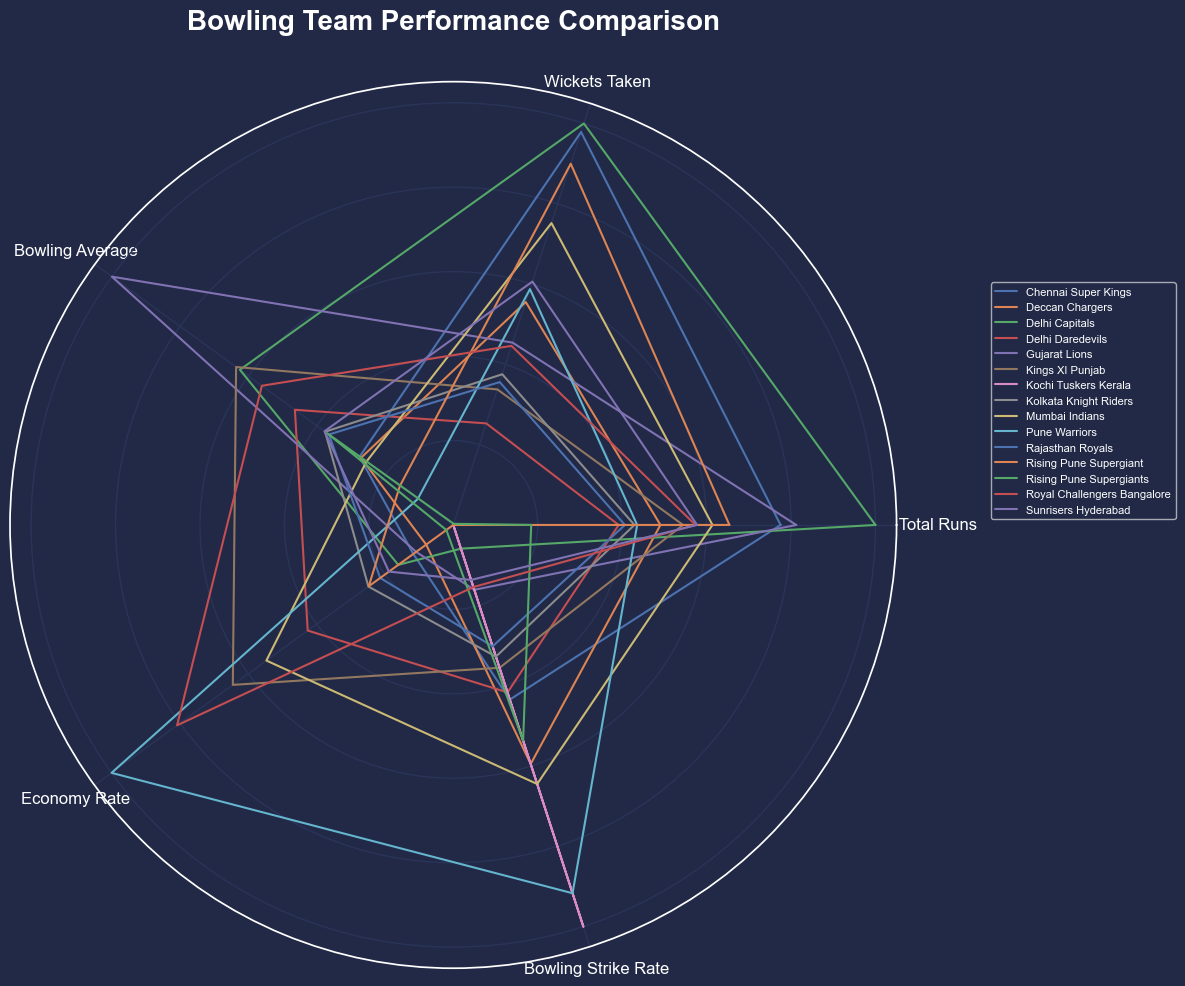

In [97]:
# Group the data by batsman
bowler_data = BowlerTeam_df.groupby(by='bowling_team')[['bowling_team', 'total_runs', 'wickets_taken', 'bowling_average', 'economy_rate', 'bowling_strike_rate']].mean().reset_index()
# Normalize the data to a scale of 0-1
numBowl_cols = ['total_runs', 'wickets_taken', 'bowling_average', 'economy_rate', 'bowling_strike_rate']
bowler_data[numBowl_cols] = (bowler_data[numBowl_cols] - bowler_data[numBowl_cols].min()) / (bowler_data[numBowl_cols].max() - bowler_data[numBowl_cols].min())
#top_teams = batsman_data.sort_values('total_runs', ascending=False).head(25).index.tolist()

# Plot the radar chart
anglesbowler = [n / float(len(numBowl_cols)) * 2 * 3.141 for n in range(len(numBowl_cols))]
anglesbowler += anglesbowler[:1]
figbowler = plt.figure(figsize=(12, 10))
figbowler.set_facecolor("#212946")

axbowler = figbowler.add_subplot(111, polar=True)
for i, row in bowler_data.iterrows():
    
        values = row[numBowl_cols].tolist()
        values += [values[0]]
        axbowler.plot(anglesbowler, values, label=i)

# Add title and axis labels
axbowler.set_title('Bowling Team Performance Comparison', fontsize=20, fontweight='bold',color="white", y=1.05)
axbowler.set_xticks(anglesbowler[:-1])
axbowler.set_xticklabels(['        Total Runs', 'Wickets Taken', 'Bowling Average', 'Economy Rate', 'Bowling Strike Rate'], fontsize=12, color="white",font="Arial")
axbowler.set_yticklabels([])
axbowler.grid(color='#2A3459')
axbowler.set_facecolor("#212946")
# Update the legend with batsman names
handlesbowler, labelsbowler = axbowler.get_legend_handles_labels()
labelsbowler = bowler_data['bowling_team'].tolist()
axbowler.legend(handlesbowler, labelsbowler, loc='lower left', bbox_to_anchor=(1.1, 0.5),fontsize=8, facecolor='#212946', labelcolor='white')
plt.tight_layout()

plt.show()

In [86]:
#calculate the total score 
total_score=0
for i in indianPLDeliveries.total_runs:
    total_score+=i

#calculate total overs
total_over=0
for i in indianPLDeliveries.over:
    total_over+=i

#calculate the most win by runs
most_win_by_runs= {winner_by_runs.iloc[0].winner:winner_by_runs.iloc[0].win_by_runs}

#calculate the most win by wickets
most_win_by_wickets= {winner_by_wickets.iloc[0].winner:winner_by_wickets.iloc[0].win_by_wickets}

#calculate the most successful player 
most_successful_player= {str(successfulPL.index[0]): successfulPL.values[0]}

#calculate the most fav umpire 
most_umpire= {str(umpire.index[0]): umpire.values[0]}

#calculate average runs, overs, and wickets per season 
average_perSeason= indianPL_mat_dliv.groupby(by='season').agg({'total_runs':'sum','over':'sum','player_dismissed':lambda x : x[x!='Not Out'].count()}).reset_index()
average_perSeason.columns=['season','total_runs','total_overs','total_wickets']
average_perSeason['total_matches']=indianPLMatches.groupby('season').agg({'id':'count'}).reset_index(drop=True)
average_perSeason['avg_run']= average_perSeason['total_runs'] / average_perSeason['total_matches']
average_perSeason['avg_over']= average_perSeason['total_overs'] / average_perSeason['total_matches']
average_perSeason['avg_wickets']= average_perSeason['total_wickets'] / average_perSeason['total_matches']


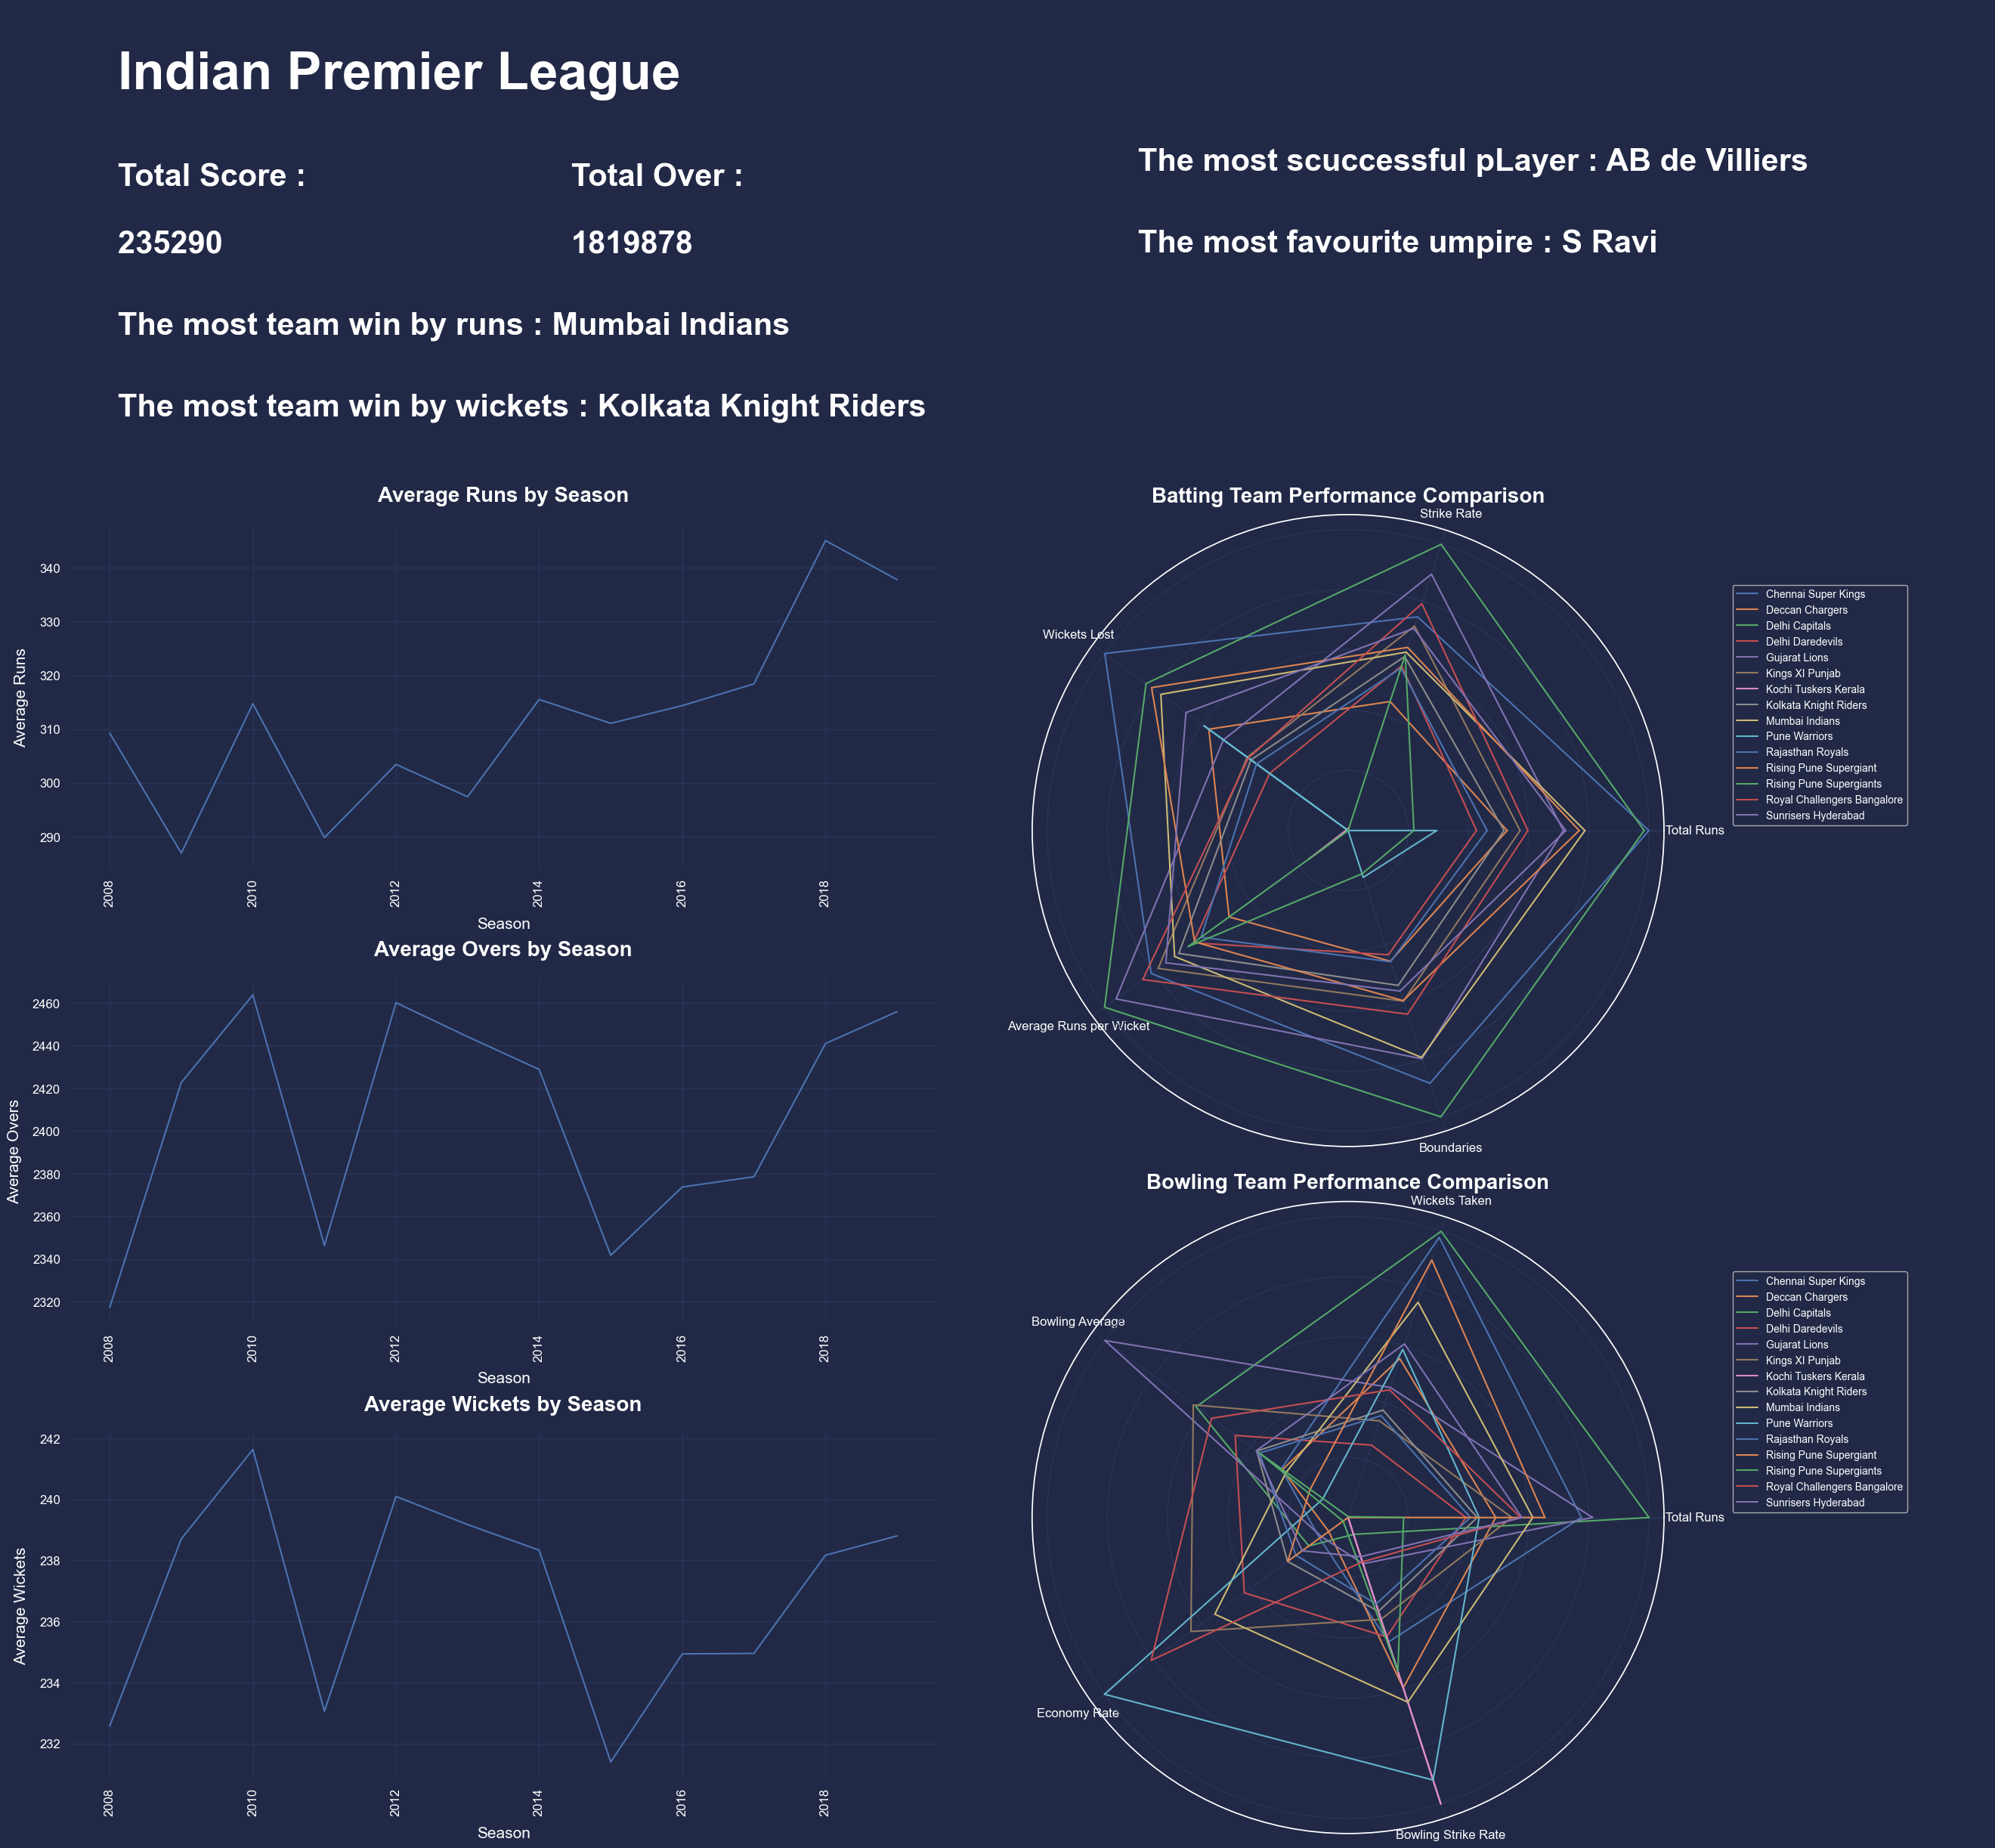

In [121]:
fig = plt.figure(layout="constrained",figsize=(25,18))
fig.set_facecolor("#212946")

subfigs = fig.subfigures(1,2,zorder=-1)
subfigs[0].set_facecolor("#212946")
subfigs[1].set_facecolor("#212946")
Header = fig.add_axes((0.05,1.05,1,0.3))
Header.axis("off")
Header.text(0.01,0.8,f"Indian Premier League",fontsize=50,color="white",font="Arial",fontweight='bold')
Header.text(0.01,0.4,f"Total Score :               \n\n{ total_score } ",fontsize=30,color="white",font="Arial",fontweight='bold')
Header.text(0.25,0.4,f"Total Over :               \n\n{ total_over }",fontsize=30,color="white",font="Arial",fontweight='bold')
Header.text(0.55,0.6,f"The most scuccessful pLayer : {', '.join(most_successful_player.keys())} ",fontsize=30,color="white",font="Arial",fontweight='bold')
Header.text(0.55,0.4,f"The most favourite umpire : { ', '.join(most_umpire.keys())}",fontsize=30,color="white",font="Arial",fontweight='bold')
Header.text(0.01,0.2,f"The most team win by runs : {', '.join(most_win_by_runs.keys())}",fontsize=30,color="white",font="Arial",fontweight='bold')
Header.text(0.01,0,f"The most team win by wickets : {', '.join(most_win_by_wickets.keys())}",fontsize=30,color="white",font="Arial",fontweight='bold')

team = subfigs[0].subplots(3, 1)

line_plot(average_perSeason,'season','avg_run',team[0],"Season","Average Runs","Average Runs by Season")

line_plot(average_perSeason,'season','avg_over',team[1],"Season","Average Overs","Average Overs by Season")

line_plot(average_perSeason,'season','avg_wickets',team[2],"Season","Average Wickets","Average Wickets by Season")



###################################################################################
subgig2= subfigs[1]
subsubfigs1 = subgig2.subfigures(2, 1)

# Plot the radar chart for batting team
anglesbatf = [n / float(len(numbat_cols)) * 2 * 3.141 for n in range(len(numbat_cols))]
anglesbatf += anglesbatf[:1]
figbatt = subsubfigs1[0]
figbatt.set_facecolor("#212946")
axbatr = figbatt.add_subplot(111, polar=True)
for i, row in batsman_data.iterrows():
    
        values = row[numbat_cols].tolist()
        values += [values[0]]
        axbatr.plot(anglesbatf, values, label=i)

# Add title and axis labels
axbatr.set_title('Batting Team Performance Comparison', fontsize=20, fontweight='bold', color="white")
axbatr.set_xticks(anglesbat[:-1])
axbatr.set_xticklabels(['        Total Runs','Strike Rate','Wickets Lost','Average Runs per Wicket','Boundaries'], fontsize=12, color="white",font="Arial")
axbatr.set_yticklabels([])
axbatr.grid(color='#2A3459')
axbatr.set_facecolor("#212946")
# Update the legend with batsman names
handlesbatt, labelsbatt = axbatr.get_legend_handles_labels()
labelsbatt = batsman_data['batting_team'].tolist()
axbatr.legend(handlesbatt, labelsbatt, loc='lower left', bbox_to_anchor=(1.1, 0.5),fontsize=10, facecolor='#212946', labelcolor='white')

#######################################################################

# Plot the radar chart for bowling team
anglesbowlerr = [n / float(len(numBowl_cols)) * 2 * 3.141 for n in range(len(numBowl_cols))]
anglesbowlerr += anglesbowlerr[:1]
figbowlerr = subsubfigs1[1]
figbowlerr.set_facecolor("#212946")
axbowlerr = figbowlerr.add_subplot(111, polar=True)

for i, row in bowler_data.iterrows():
    
        values = row[numBowl_cols].tolist()
        values += [values[0]]
        axbowlerr.plot(anglesbowlerr, values, label=i)

# Add title and axis labels
axbowlerr.set_title('Bowling Team Performance Comparison', fontsize=20, fontweight='bold', color='white')
axbowlerr.set_xticks(anglesbowler[:-1])
axbowlerr.set_xticklabels(['        Total Runs', 'Wickets Taken', 'Bowling Average', 'Economy Rate', 'Bowling Strike Rate'], fontsize=12, color="white",font="Arial")
axbowlerr.set_yticklabels([])
axbowlerr.grid(color='#2A3459')
axbowlerr.set_facecolor("#212946")
# Update the legend with batsman names
handlesbowlerr, labelsbowlerr = axbowlerr.get_legend_handles_labels()
labelsbowlerr = bowler_data['bowling_team'].tolist()
axbowlerr.legend(handlesbowlerr, labelsbowlerr, loc='lower left', bbox_to_anchor=(1.1, 0.5),fontsize=10, facecolor='#212946', labelcolor='white')
######################################################################



plt.show()

# Recommandations  (Teams And Players)for company:

1. Teams:
 - Mumbai Indians 
 - Kolkata knight riders
 - Chennai Super Kings
 - Royal Challengers Bangalore
 - Delhi Daredevils
2. Players:
 - AB de Villiers
 - CH Gayle
 - DA Warner
 - A Kumble
 - SE Marsh
 
